# World University Ranking

As a geo-political indicator as well as an aid to strategic management of institutions and a crucial factor in the study choices made by millions of students around the world

## Context
From: https://www.kaggle.com/mylesoneill/world-university-rankings

Of all the universities in the world, which are the best?

Ranking universities is a difficult, political, and controversial practice. There are hundreds of different national and international university ranking systems, many of which disagree with each other. This dataset contains 3 global university rankings from very different places.

    The Times Higher Education World University Ranking(Chosen)
    The Academic Ranking of World Universities 
    The Center for World University Rankings

### Times Higher Education World University Ranking
Website: https://www.timeshighereducation.com/world-university-rankings

The Times Higher Education World University Rankings, founded in 2004, provide the definitive list of the world's best universities, evaluated across teaching, research, international outlook, reputation and more. THE’s data are trusted by governments and universities and are a vital resource for students, helping them choose where to study.
    
    Five decades of experience as a source of analysis and insight on higher education;
    Unparalleled expertise on the trends underpinning university performance globally;

#### Data collection
Institutions provide and sign off their institutional data for use in the rankings. On the rare occasions when a particular data point is not provided – which affects only low-weighted indicators such as industrial income – we enter a low estimate between the average value of the indicators and the lowest value reported: the 25th percentile of the other indicators.

### Why I choose WUR?
Within university: my WAM is my rank

Ouside university: my univesity rank is my mark

Find out what is the crucial performance indicator to a university's world rank. 

Import libraries

Seaborn provides a high-level interface for drawing attractive statistical graphics.

Geopandas can make working with geospatial data in python easier. 

In [11]:
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn as sns
import os
import re
import geopandas as gpd

Some magic that tells jupyter to put graphs and things in the notebook 

instead of the default behaviour which is to save it as a file.

Give us a style state to go back to

In [12]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
saved_style_state = matplotlib.rcParams.copy()

In [26]:
if os.path.isfile("timesData.csv"):
    filepath = "timesData.csv"
    print "loading from file"
else:
    filepath = "https://www.kaggle.com/mylesoneill/world-university-rankings/downloads/timesData.csv"
    print "loading from the Internet"
wur_data = pd.read_csv(filepath)
print "done"

loading from file
done


Have a general overview what the dataset looks like.

In [14]:
wur_data.head()

world_rank                        university_name                   country  \
0          1                     Harvard University  United States of America   
1          2     California Institute of Technology  United States of America   
2          3  Massachusetts Institute of Technology  United States of America   
3          4                    Stanford University  United States of America   
4          5                   Princeton University  United States of America   

   teaching international  research  citations income total_score  \
0      99.7          72.4      98.7       98.8   34.5        96.1   
1      97.7          54.6      98.0       99.9   83.7        96.0   
2      97.8          82.3      91.4       99.9   87.5        95.6   
3      98.3          29.5      98.1       99.2   64.3        94.3   
4      90.9          70.3      95.4       99.9      -        94.2   

  num_students  student_staff_ratio international_students female_male_ratio  \
0       20,152                  8.9                    25%               NaN   
1        2,243                  6.9                    27%           33 : 67   
2       11,074                  9.0                    33%           37 : 63   
3       15,596                  7.8                    22%           42 : 58   
4        7,929                  8.4                    27%           45 : 55   

   year  
0  2011  
1  2011  
2  2011  
3  2011  
4  2011

Get the concise summary of the whole dataframe: (semicolon cannot suppress dataframe.info output)

Index

Columns

Data type

Meory usage

...

In [15]:
wur_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2603 non-null object
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2603 non-null object
total_score               2603 non-null object
num_students              2544 non-null object
student_staff_ratio       2544 non-null float64
international_students    2536 non-null object
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 284.8+ KB


Only focus on one row.

In [16]:
wur_data.iloc[1]

world_rank                                                 2
university_name           California Institute of Technology
country                             United States of America
teaching                                                97.7
international                                           54.6
research                                                  98
citations                                               99.9
income                                                  83.7
total_score                                             96.0
num_students                                           2,243
student_staff_ratio                                      6.9
international_students                                   27%
female_male_ratio                                    33 : 67
year                                                    2011
Name: 1, dtype: object

Column description

    
    world_rank - world rank for the university. Contains rank ranges and equal ranks (eg. =94 and 201-250).
    university_name - name of university.
    country - country of each university.
    teaching - university score for teaching (the learning environment).
    international - university score international outlook (staff, students, research).
    research - university score for research (volume, income and reputation).

    citations - university score for citations (research influence).
    income - university score for industry income (knowledge transfer).
    total_score - total score for university, used to determine rank.
    num_students - number of students at the university.
    student_staff_ratio - Number of students divided by number of staff.
    international_students - Percentage of students who are international.
    female_male_ratio - Female student to Male student ratio.
    year - year of the ranking (2011 to 2016 included).

The performance indicators are grouped into five areas:

    30%  Teaching (the learning environment)
    30%  Research (volume, income and reputation)
    30%  Citations (research influence)
    7.5% International outlook (staff, students and research)
    2.5% Industry income (knowledge transfer).


After an overview, two modifications need to be done:

Delete or drop rows, columns, values... (which are not deriable or applicable for data visualisation and analysis)

Change data type (Some numeric values are string, which is a disaster when using pandas to deal with a dataset) 

Zip dtype with row_1 (and then change the data type of numbers from string to int or float).

In [17]:
dtype = zip([type(x) for x in wur_data.ix[1]], wur_data.ix[1], wur_data.ix[1].keys())
dtype

[(str, '2', 'world_rank'),
 (str, 'California Institute of Technology', 'university_name'),
 (str, 'United States of America', 'country'),
 (numpy.float64, 97.700000000000003, 'teaching'),
 (str, '54.6', 'international'),
 (numpy.float64, 98.0, 'research'),
 (numpy.float64, 99.900000000000006, 'citations'),
 (str, '83.7', 'income'),
 (str, '96.0', 'total_score'),
 (str, '2,243', 'num_students'),
 (numpy.float64, 6.9000000000000004, 'student_staff_ratio'),
 (str, '27%', 'international_students'),
 (str, '33 : 67', 'female_male_ratio'),
 (numpy.int64, 2011, 'year')]

## world_rank

Use dataframe.value_counts() to find some undesirable vaules in the column or some weird symbols within a value.

In [19]:
wur_data['world_rank'].value_counts()

301-350    248
601-800    200
351-400    198
276-300    104
201-225    103
226-250    100
501-600    100
401-500     99
251-275     97
201-250     53
350-400     51
251-300     49
117         10
178         10
124         10
103         10
164          9
98           9
2            9
109          9
193          9
132          9
52           9
43           8
68           8
83           8
94           8
157          8
156          8
59           8
          ... 
=133         2
=60          2
=196         2
=193         2
=39          2
=110         2
=172         2
=44          2
=47          2
=104         2
=180         2
=56          2
=131         2
=65          2
=76          2
=138         2
=88          2
=190         2
105          2
=82          2
166          2
=158         2
82           2
=144         2
=125         2
=123         2
=99          2
123          2
=176         2
179          1
Name: world_rank, dtype: int64

Dash symbol in the middle over 200

Equal sign in the front for the smme world rank under 200

Drop rows based on column value which contains dash symbol '-'.

Therefore only keep 200 universities every year for the following data visualisaiton and analysis.

In [27]:
wur_data = wur_data[wur_data['world_rank'].str.contains('-') == False]

Define a function to replace some undesirable symbols inside values.

In [1]:
def replace(df, column):
    boo_null = df[column].isnull() == False
    if df[column][boo_null].str.contains('=').any():
        df[column] = df[column][boo_null].apply(lambda x: re.sub('=', '', x))
    elif df[column][boo_null].str.contains(',').any():
        df[column] = df[column][boo_null].apply(lambda x: re.sub(',', '', x))
    elif df[column][boo_null].str.contains('%').any():
        df[column] = df[column][boo_null].apply(lambda x: re.sub('%', '', x))

Replace equal sign '=' with nothing ''.

In [29]:
replace(wur_data, 'world_rank')

Define a function to change data type of numeric values to float or integer.

In [23]:
def change_dtype(column, dtype):
    boo_null = wur_data[column].isnull() == False
    boo_minus = wur_data[column] != '-'
    return wur_data[column][boo_null][boo_minus].apply(dtype)

Change data type from string to integer

In [30]:
wur_data['world_rank'] = change_dtype('world_rank', int)

## international

In [31]:
wur_data['international'].value_counts()

-       9
62.8    7
64.0    7
31.7    6
64.3    6
56.4    6
90.5    5
32.9    5
44.9    5
46.8    5
70.3    5
60.5    5
49.2    5
85.1    5
52.6    5
33.1    5
47.3    5
57.8    5
66.6    5
87.0    5
36.0    5
54.4    4
69.0    4
77.8    4
86.1    4
54.7    4
33.4    4
67.6    4
77.2    4
56.3    4
       ..
20.2    1
46.5    1
20.7    1
20.9    1
58.4    1
88.5    1
24.4    1
52.4    1
76.6    1
50.5    1
50.4    1
50.1    1
50.2    1
85.8    1
74.6    1
78.8    1
16.7    1
76.0    1
16.8    1
24.9    1
69.8    1
69.3    1
69.2    1
51.9    1
69.4    1
26.5    1
26.3    1
28.5    1
24.8    1
35.8    1
Name: international, dtype: int64

Ignore values of '-' and change data type of other values to float.

In [32]:
wur_data['international'] = change_dtype('international', float)

## income

In [33]:
wur_data['income'].value_counts()

-        140
100.0     56
99.9      12
40.0      10
34.4       9
31.1       7
40.8       7
39.4       7
38.3       7
33.5       7
49.8       7
37.7       6
30.6       6
42.1       6
31.6       6
32.4       5
32.3       5
32.8       5
42.5       5
32.2       5
43.8       5
40.6       5
38.6       5
32.6       5
40.3       5
53.7       5
33.7       5
39.5       5
34.7       5
39.6       5
        ... 
70.4       1
77.1       1
47.5       1
47.3       1
48.5       1
47.8       1
75.0       1
91.8       1
55.2       1
51.7       1
51.3       1
68.3       1
68.2       1
68.7       1
58.2       1
55.4       1
53.5       1
53.4       1
53.6       1
53.2       1
90.4       1
61.8       1
61.6       1
61.4       1
61.5       1
61.2       1
61.1       1
63.8       1
77.0       1
47.0       1
Name: income, dtype: int64

The same with 'international'.

In [34]:
wur_data['income'] = change_dtype('income', float)

## total_score

In [35]:
wur_data['total_score'].value_counts()

49.0    13
51.1    12
46.6    11
46.9    10
50.1    10
56.1    10
51.2    10
51.9     9
54.5     9
52.9     9
46.7     9
49.9     9
46.2     9
50.2     9
57.7     9
54.4     8
50.5     8
51.6     8
67.0     7
49.7     7
53.4     7
65.9     7
54.6     7
51.0     7
53.6     7
50.3     7
50.0     7
59.0     7
53.9     7
52.1     7
        ..
60.9     1
75.9     1
82.2     1
78.7     1
62.1     1
82.8     1
78.0     1
72.6     1
72.9     1
84.9     1
80.5     1
89.2     1
41.6     1
90.2     1
71.4     1
71.7     1
71.6     1
65.3     1
66.6     1
78.2     1
66.4     1
65.8     1
90.9     1
66.2     1
79.1     1
79.4     1
73.3     1
73.4     1
67.1     1
82.7     1
Name: total_score, dtype: int64

No strange symbols.

In [36]:
wur_data['total_score'] = change_dtype('total_score', float)

## num_students

In [37]:
wur_data['num_students'].value_counts()

9,248     6
14,221    6
12,001    6
12,551    6
23,505    6
41,786    6
11,964    6
9,666     6
34,938    6
14,604    6
26,607    6
32,166    6
25,266    6
8,338     6
25,028    6
35,691    6
24,789    6
2,429     6
42,727    6
31,715    6
37,917    6
28,881    6
11,074    6
50,152    6
26,199    6
15,408    6
2,400     6
15,521    6
46,825    6
14,992    6
         ..
5,144     1
36,108    1
9,336     1
23,347    1
769       1
23,122    1
22,064    1
36,146    1
20,713    1
47,508    1
10,221    1
18,209    1
26,420    1
29,743    1
13,855    1
15,064    1
34,550    1
23,819    1
17,940    1
30,538    1
3,879     1
16,841    1
9,187     1
6,853     1
39,838    1
43,280    1
51,351    1
11,761    1
1,283     1
10,441    1
Name: num_students, dtype: int64

Replace comma ',' with nothing ''.

In [38]:
replace(wur_data, 'num_students')

In [39]:
wur_data['num_students'] = change_dtype('num_students', int)

## international_students

In [40]:
wur_data['international_students'].value_counts()

12%    58
10%    58
16%    56
9%     53
15%    51
14%    49
25%    47
13%    47
17%    46
11%    45
19%    45
20%    43
18%    42
28%    37
8%     37
7%     36
22%    34
23%    32
26%    31
33%    30
35%    29
27%    29
34%    24
21%    24
37%    23
36%    18
24%    17
29%    17
6%     14
5%     14
4%     14
30%    13
38%     9
1%      7
39%     7
40%     6
31%     6
54%     6
46%     6
47%     6
51%     6
48%     5
2%      2
32%     1
52%     1
Name: international_students, dtype: int64

Convert percentage string to float.

Srip of the percentage sign '%' at the end of the values.

In [41]:
replace(wur_data, 'international_students')

In [42]:
wur_data['international_students'] = change_dtype('international_students', float)

Divided by 100.

In [43]:
wur_data['international_students'] = [x/100 for x in wur_data['international_students']]

## female_male_ratio

In [44]:
wur_data['female_male_ratio'].value_counts()

54 : 46    114
52 : 48     95
53 : 47     81
48 : 52     66
56 : 44     65
51 : 49     56
50 : 50     56
57 : 43     52
55 : 45     48
58 : 42     46
49 : 51     35
47 : 53     27
46 : 54     26
31 : 69     23
44 : 56     21
42 : 58     20
45 : 55     19
37 : 63     18
59 : 41     18
26 : 74     15
60 : 40     15
61 : 39     15
39 : 61     15
62 : 38     14
67 : 33     13
27 : 73     13
33 : 67     13
20 : 80     12
30 : 70     10
19 : 81      6
66 : 34      6
18 : 82      6
70 : 30      6
32 : 68      6
63 : 37      5
25 : 75      5
13 : 87      5
34 : 66      3
28 : 72      3
43 : 57      2
35 : 65      2
41 : 59      1
64 : 36      1
Name: female_male_ratio, dtype: int64

Ignore the colon ':' and do the division using the numbers before and after the colon.

In [45]:
boo_ratio = wur_data['female_male_ratio'].isnull() == False
x = wur_data['female_male_ratio'][boo_ratio].str[:2].apply(float)
y = wur_data['female_male_ratio'][boo_ratio].str[4:].apply(float)
wur_data['female_male_ratio'][boo_ratio] = [m/n for m, n in zip(x, y)];

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [46]:
wur_data.head()

world_rank                        university_name  \
0           1                     Harvard University   
1           2     California Institute of Technology   
2           3  Massachusetts Institute of Technology   
3           4                    Stanford University   
4           5                   Princeton University   

                    country  teaching  international  research  citations  \
0  United States of America      99.7           72.4      98.7       98.8   
1  United States of America      97.7           54.6      98.0       99.9   
2  United States of America      97.8           82.3      91.4       99.9   
3  United States of America      98.3           29.5      98.1       99.2   
4  United States of America      90.9           70.3      95.4       99.9   

   income  total_score  num_students  student_staff_ratio  \
0    34.5         96.1       20152.0                  8.9   
1    83.7         96.0        2243.0                  6.9   
2    87.5         95.6       11074.0                  9.0   
3    64.3         94.3       15596.0                  7.8   
4     NaN         94.2        7929.0                  8.4   

   international_students female_male_ratio  year  
0                    0.25               NaN  2011  
1                    0.27          0.492537  2011  
2                    0.33          0.587302  2011  
3                    0.22          0.724138  2011  
4                    0.27          0.818182  2011

Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [47]:
wur_data.describe()

world_rank     teaching  international     research    citations  \
count  1201.000000  1201.000000    1192.000000  1201.000000  1201.000000   
mean    100.233972    50.730808      59.478523    52.252040    76.928726   
std      57.634735    16.912699      21.209330    19.661541    15.535493   
min       1.000000    15.900000      14.800000    13.100000     8.600000   
25%      50.000000    38.300000      42.175000    37.100000    66.700000   
50%     100.000000    47.500000      59.500000    48.500000    78.800000   
75%     150.000000    60.200000      77.700000    64.700000    89.200000   
max     200.000000    99.700000     100.000000    99.400000   100.000000   

            income  total_score   num_students  student_staff_ratio  \
count  1061.000000  1201.000000    1182.000000          1182.000000   
mean     54.230914    59.846128   23891.501692            15.932318   
std      22.722593    12.803446   13635.554030             9.437269   
min      24.200000    41.400000     462.000000             3.600000   
25%      36.300000    50.300000   14221.000000            10.200000   
50%      45.800000    56.000000   22616.000000            14.700000   
75%      68.200000    66.200000   31326.000000            18.700000   
max     100.000000    96.100000  127431.000000            85.800000   

       international_students         year  
count             1181.000000  1201.000000  
mean                 0.196274  2013.501249  
std                  0.101746     1.708374  
min                  0.010000  2011.000000  
25%                  0.120000  2012.000000  
50%                  0.180000  2014.000000  
75%                  0.260000  2015.000000  
max                  0.540000  2016.000000

Mean value is only slightly more than the half of the maxmimum (world_rank, teaching, international, research, income, total_score);

Maxmimum value is very close or equal to the full score;

Standard deviation is quite huge, except for international_students, year;

## Average Number of Universities within Top 200 in a Country

Get a pandas Series with index = country, value = number of universities.

In [48]:
num_years = abs(wur_data['year'].iloc[0] - wur_data['year'].iloc[-1]) + 1
country_uni = wur_data['country'].value_counts()/num_years;

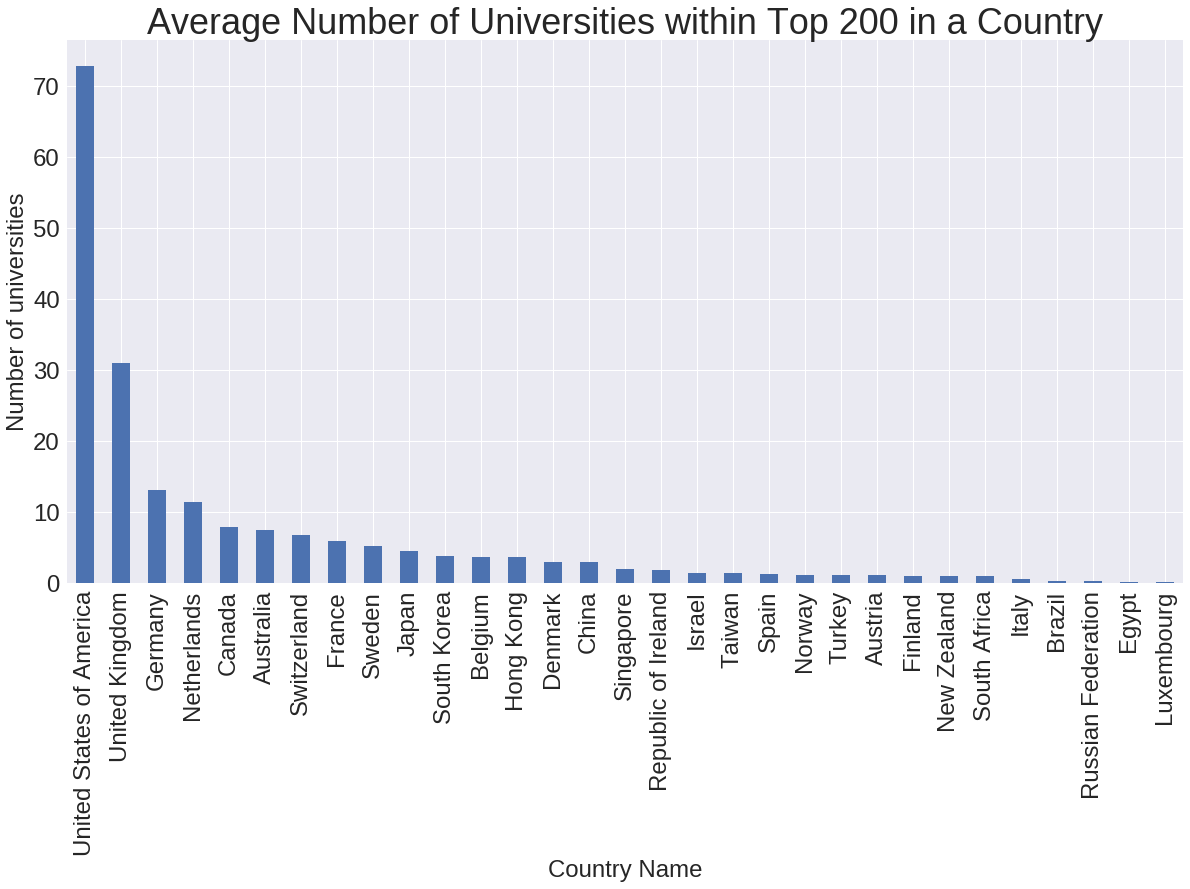

In [49]:
ax = country_uni.sort_values(ascending = False).plot(kind = 'bar', fontsize = 24, legend=False)
ax.set_title('Average Number of Universities within Top 200 in a Country', size=36)
ax.set_xlabel('Country Name', size=24)
ax.set_ylabel('Number of universities', size=24)

World rank top 200 universities across 6 years from 2011 to 2016.

Average unmber of universities in 6 years of every country:

Obviously, USA is predominatant, around 75;

Folllowed by UK, slightly more than 30, a sudden drop by more than a half;

The sum of the rest countries is just less than the sum of USA and UK.

## geopandas

Then use geopandas to display a geospatial distribution of top 200 universities

Since my dataset has no corresponding cities but only countries,

the demonstration is only in country level.

First, load a dataset containing natrual earth geometries from geopandas

In [50]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

continent  gdp_md_est  \
0           Asia     22270.0   
1         Africa    110300.0   
2         Europe     21810.0   
3           Asia    184300.0   
4  South America    573900.0   

                                            geometry iso_a3  \
0  POLYGON ((61.21081709172574 35.65007233330923,...    AFG   
1  (POLYGON ((16.32652835456705 -5.87747039146621...    AGO   
2  POLYGON ((20.59024743010491 41.85540416113361,...    ALB   
3  POLYGON ((51.57951867046327 24.24549713795111,...    ARE   
4  (POLYGON ((-65.50000000000003 -55.199999999999...    ARG   

                   name     pop_est  
0           Afghanistan  28400000.0  
1                Angola  12799293.0  
2               Albania   3639453.0  
3  United Arab Emirates   4798491.0  
4             Argentina  40913584.0

Before reindexing dataframe countr_uni by world['name']

In [51]:
country_uni.index

Index([u'United States of America', u'United Kingdom', u'Germany',
       u'Netherlands', u'Canada', u'Australia', u'Switzerland', u'France',
       u'Sweden', u'Japan', u'South Korea', u'Belgium', u'Hong Kong', u'China',
       u'Denmark', u'Singapore', u'Republic of Ireland', u'Israel', u'Taiwan',
       u'Spain', u'Norway', u'Turkey', u'Austria', u'Finland', u'New Zealand',
       u'South Africa', u'Italy', u'Brazil', u'Russian Federation', u'Egypt',
       u'Luxembourg'],
      dtype='object')

In [52]:
world['name'].values

array([u'Afghanistan', u'Angola', u'Albania', u'United Arab Emirates',
       u'Argentina', u'Armenia', u'Antarctica', u'Fr. S. Antarctic Lands',
       u'Australia', u'Austria', u'Azerbaijan', u'Burundi', u'Belgium',
       u'Benin', u'Burkina Faso', u'Bangladesh', u'Bulgaria', u'Bahamas',
       u'Bosnia and Herz.', u'Belarus', u'Belize', u'Bolivia', u'Brazil',
       u'Brunei', u'Bhutan', u'Botswana', u'Central African Rep.',
       u'Canada', u'Switzerland', u'Chile', u'China', u"C\xf4te d'Ivoire",
       u'Cameroon', u'Dem. Rep. Congo', u'Congo', u'Colombia',
       u'Costa Rica', u'Cuba', u'N. Cyprus', u'Cyprus', u'Czech Rep.',
       u'Germany', u'Djibouti', u'Denmark', u'Dominican Rep.', u'Algeria',
       u'Ecuador', u'Egypt', u'Eritrea', u'Spain', u'Estonia', u'Ethiopia',
       u'Finland', u'Fiji', u'Falkland Is.', u'France', u'Gabon',
       u'United Kingdom', u'Georgia', u'Ghana', u'Guinea', u'Gambia',
       u'Guinea-Bissau', u'Eq. Guinea', u'Greece', u'Greenland',
      

Define a function to find out some country names which are different between country_uni and world['name'].

In [53]:
def check_in(df):
    index = df.index
    in_out = {}
    for x in index:
        if x in world['name'].values:
            in_out[x] = True
        else:
            in_out[x] = False
    return in_out

In [54]:
check_in(country_uni)

{'Australia': True,
 'Austria': True,
 'Belgium': True,
 'Brazil': True,
 'Canada': True,
 'China': True,
 'Denmark': True,
 'Egypt': True,
 'Finland': True,
 'France': True,
 'Germany': True,
 'Hong Kong': False,
 'Israel': True,
 'Italy': True,
 'Japan': True,
 'Luxembourg': True,
 'Netherlands': True,
 'New Zealand': True,
 'Norway': True,
 'Republic of Ireland': False,
 'Russian Federation': False,
 'Singapore': False,
 'South Africa': True,
 'South Korea': False,
 'Spain': True,
 'Sweden': True,
 'Switzerland': True,
 'Taiwan': True,
 'Turkey': True,
 'United Kingdom': True,
 'United States of America': False}

There are several mismatches between the country names of two datasets.

1. rename indcies;

2. modify values;

3. delete rows.

P.S. No Singapore in geopandas

In [55]:
country_uni = country_uni.rename(index = {'United States of America': 'United States', 'South Korea': 'Korea', 'Republic of Ireland': 'Ireland', 'Russian Federation': 'Russia', })
country_uni['China'] = country_uni['China'] + country_uni['Hong Kong']
del country_uni['Hong Kong'];

Reindex dataframe country_uni by world['name'];

Fill missing values as 0.

In [56]:
country_uni = country_uni.reindex(world['name'], fill_value = 0);

Add one column called 'uni_per_country' into world;

Pass values of dataframe country_uni to 'uni_per_country'.

Then every country in world has both geometries and university numbers.

In [57]:
world['uni_per_country'] = country_uni.values

Get value range of column 'uni_per_country';

plot the choropleth map with a colorbar on the right.

In [58]:
vmin = world['uni_per_country'].min()
vmax = world['uni_per_country'].max()

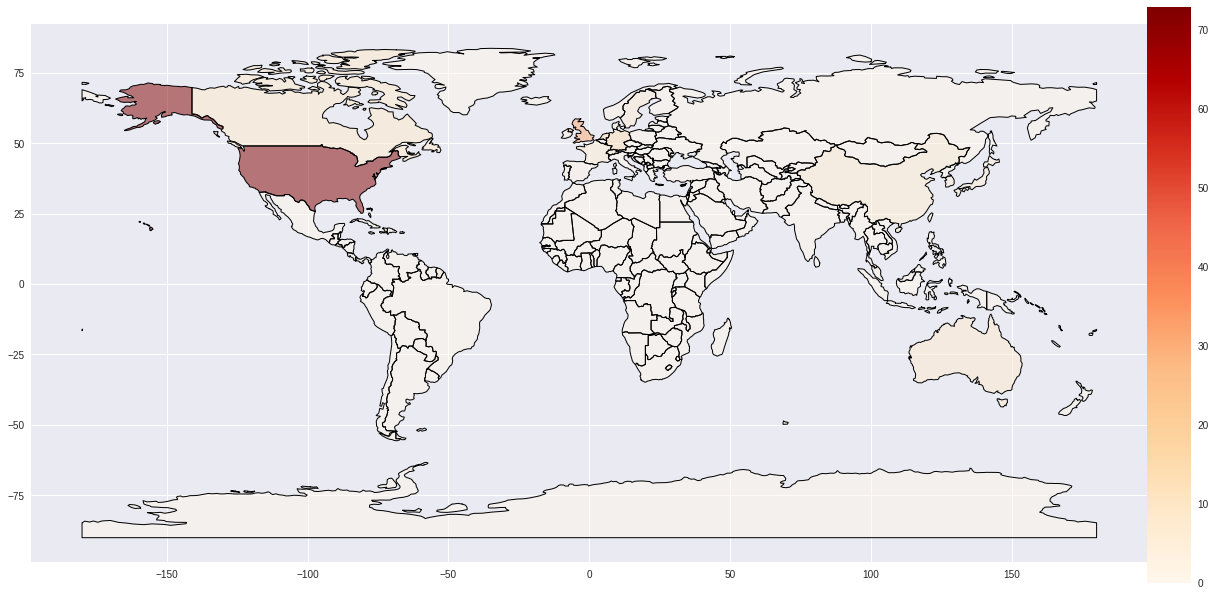

In [59]:
import shapely
ax = world.plot(column = 'uni_per_country', cmap="OrRd")
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax);

Overall, USA has a very DARK color.

while in contrast, the colors of all other countries are almost the same and faded away.

Mostly, we only care about the first, while the second is nothing but the same as the rest that we barely know.

## University with average world rank top 10

pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')

In [60]:
uni_rank = wur_data.pivot_table(index = 'university_name', values = 'world_rank', aggfunc = np.mean)

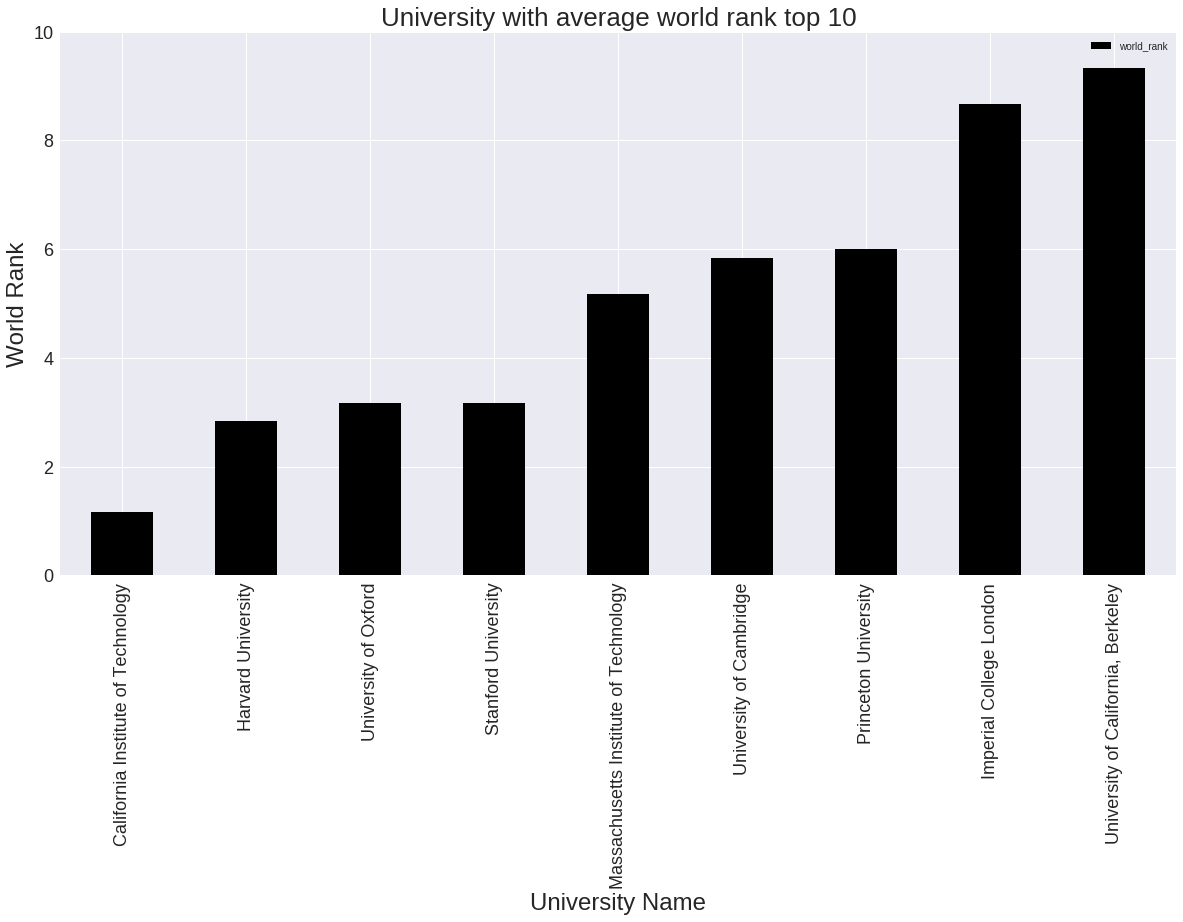

In [61]:
ax = uni_rank.sort_values(ascending = True)[uni_rank < 10.1].plot(kind='bar', fontsize= 18, legend=True, color='black')
ax.set_xlabel('University Name', size=24)
ax.set_ylabel('World Rank', size=24)
ax.set_title('University with average world rank top 10', size=26)
ax.set_ylim(0, 10)
ax.grid(True)

3 UK; 6 USA.

## Average score of each indicator of every country from 2011 to 2016

Define a fucniton that creates a spreadsheet-style pivot table as a DataFrame and save to a dictionary.

The performance indicators are grouped into five areas:

    30%  Teaching (the learning environment)
    30%  Research (volume, income and reputation)
    30%  Citations (research influence)
    7.5% International outlook (staff, students and research)
    2.5% Industry income (knowledge transfer).


In [103]:
def score_mean(df, index, column):
    score_dict={}
    for i in range(3,9):
        x = df.columns[i]
        score_dict[x] = df.pivot_table(index=index, columns=column, values=x, aggfunc=np.mean, dropna=True)
    return score_dict

Get two dictionary with pivot tables.

In [105]:
score_cy = score_mean(wur_data, 'country', 'year')

In [110]:
score_yc = score_mean(wur_data, 'year', 'country')

Define a function to loop year from 2011 to 2016 while plotting mean score bar chart versus country for every indicator.

In [106]:
def loop_year(column):
    for i in range(2011, 2017):
        ax = score_cy['total_score'][i].sort_values(ascending=False).plot(kind='bar')
        if '_' in column:
            column = column.replace('_', ' ')
        ax.set_xlabel('Country Name', size=24)
        ax.set_ylabel('Average Score', size=24)
        ax.set_title('Average Score of {} in Year {}'.format(column, i).title(), size=26)
        plt.show()

Define a function to plot mean score bar chart for every indicator versus country across 6 years.

In [139]:
def bar_indicator(column):
    ax = score_yc[column].mean().sort_values(ascending=False).plot(kind='bar')
    if '_' in column:
        column = column.replace('_', ' ')
    ax.set_xlabel('Country Name', size=24)
    ax.set_ylabel('Average Score', size=24)
    ax.set_title('Average Score of {} across 6 years'.format(column).title(), size=26)
    plt.show()

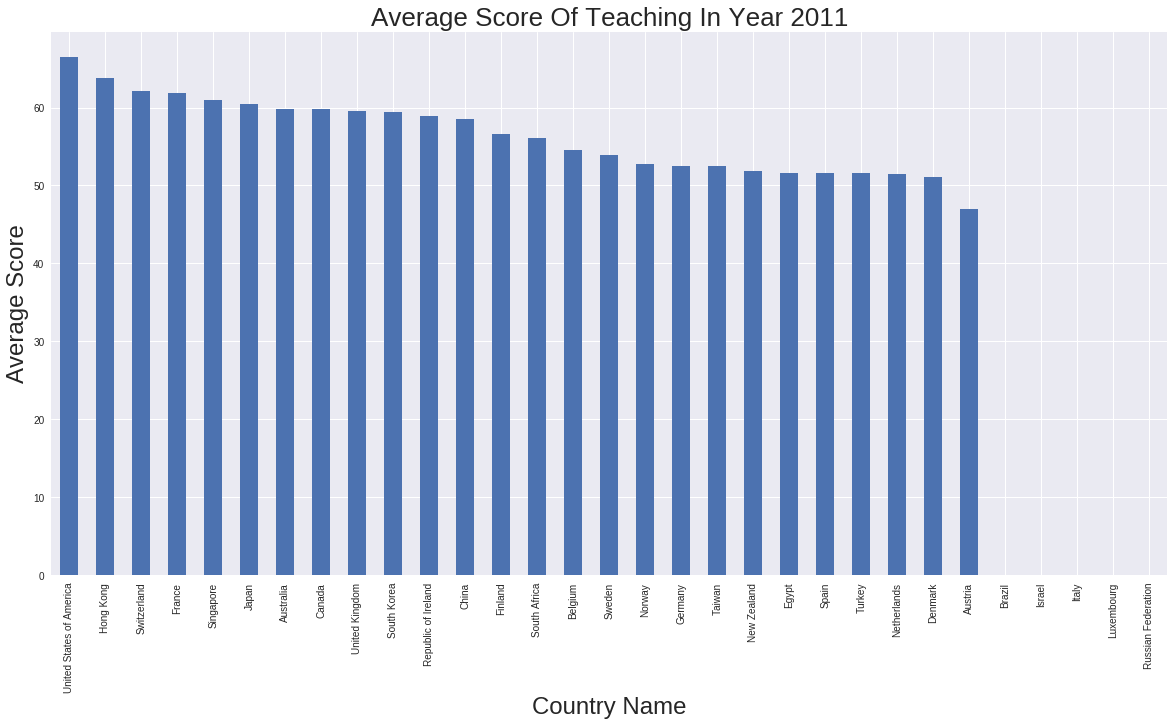

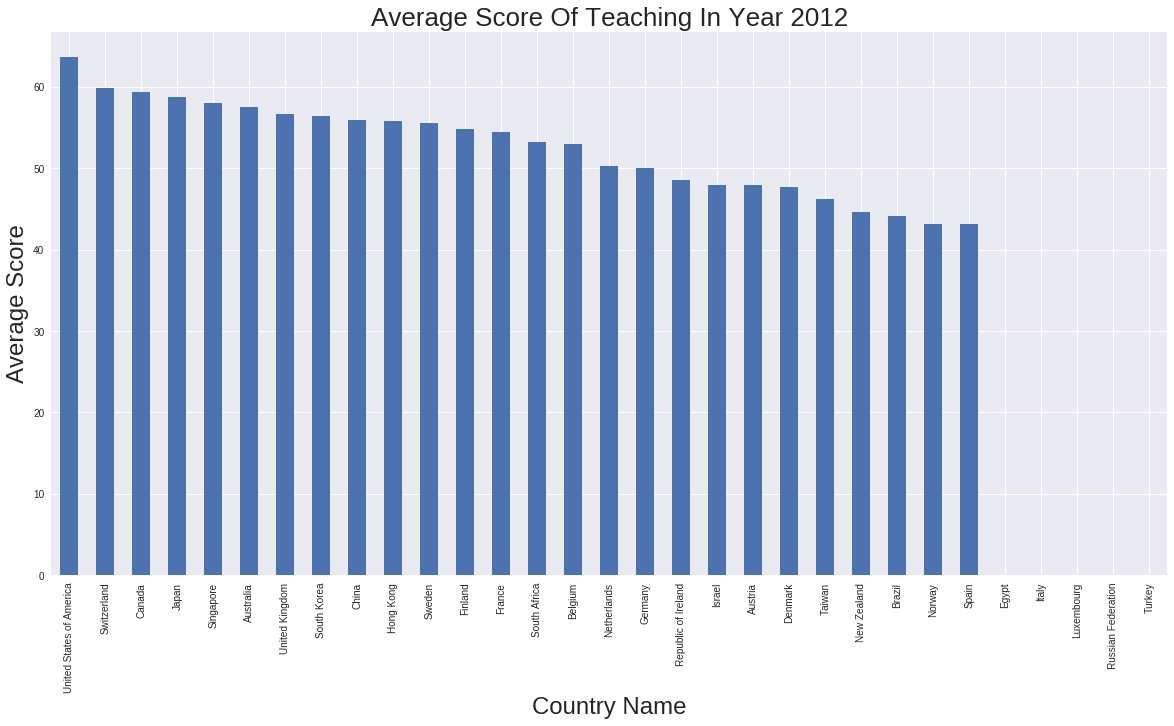

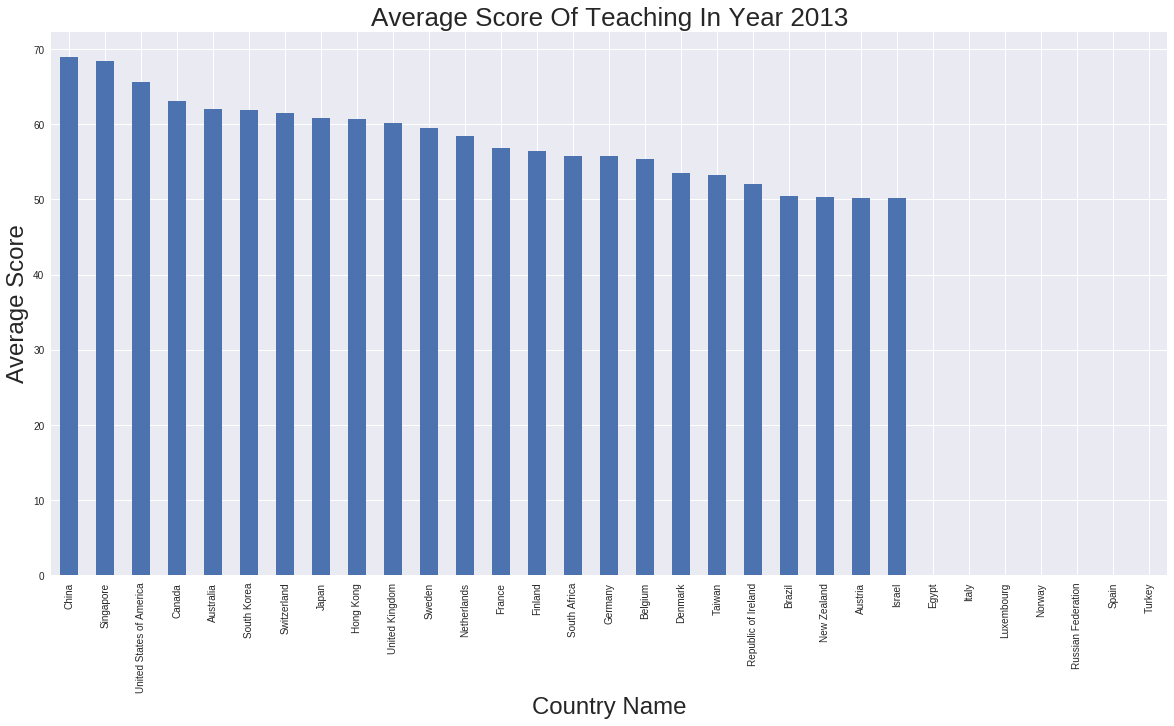

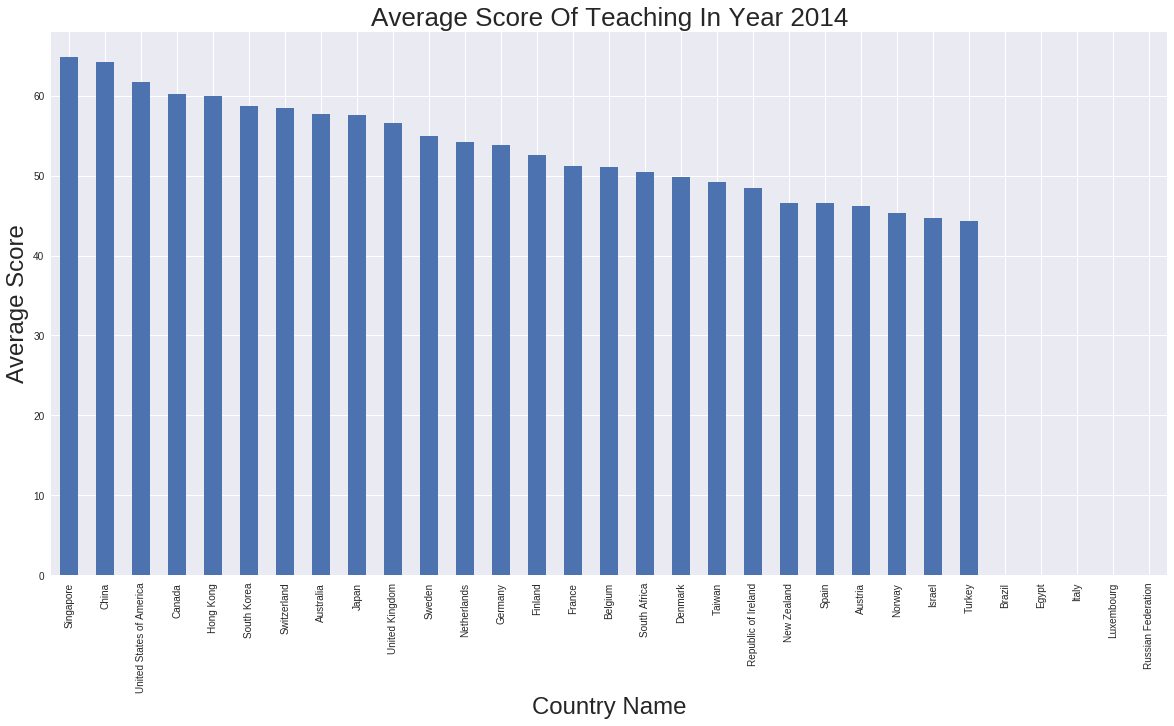

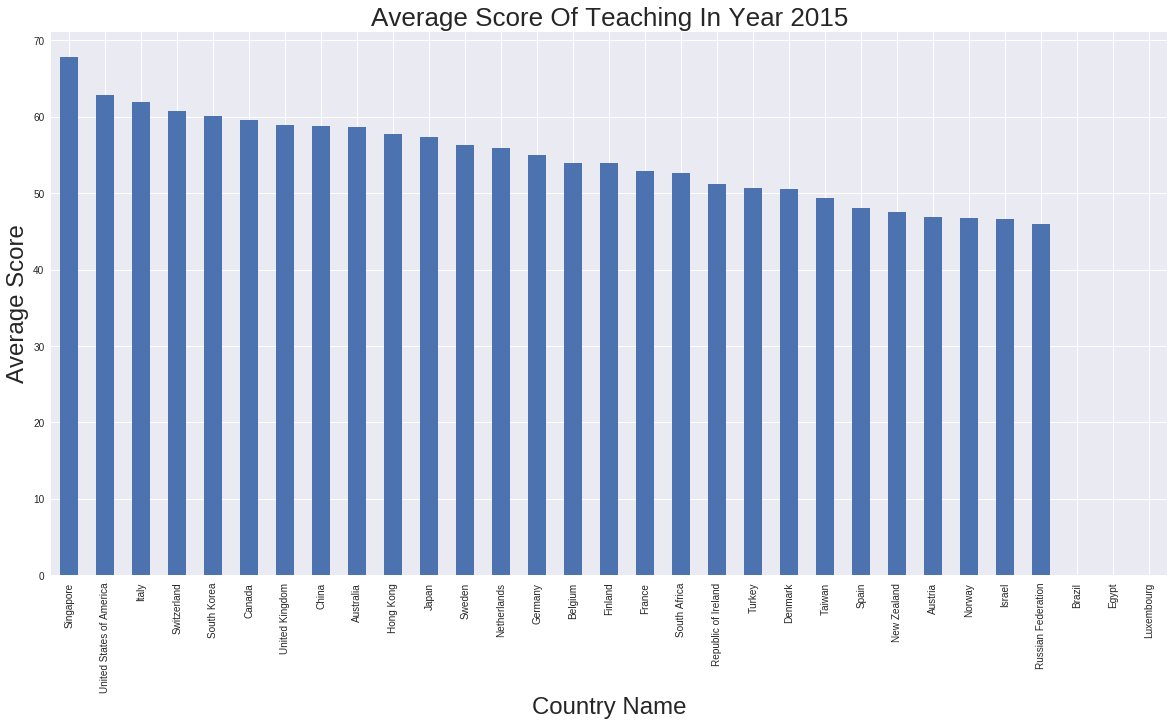

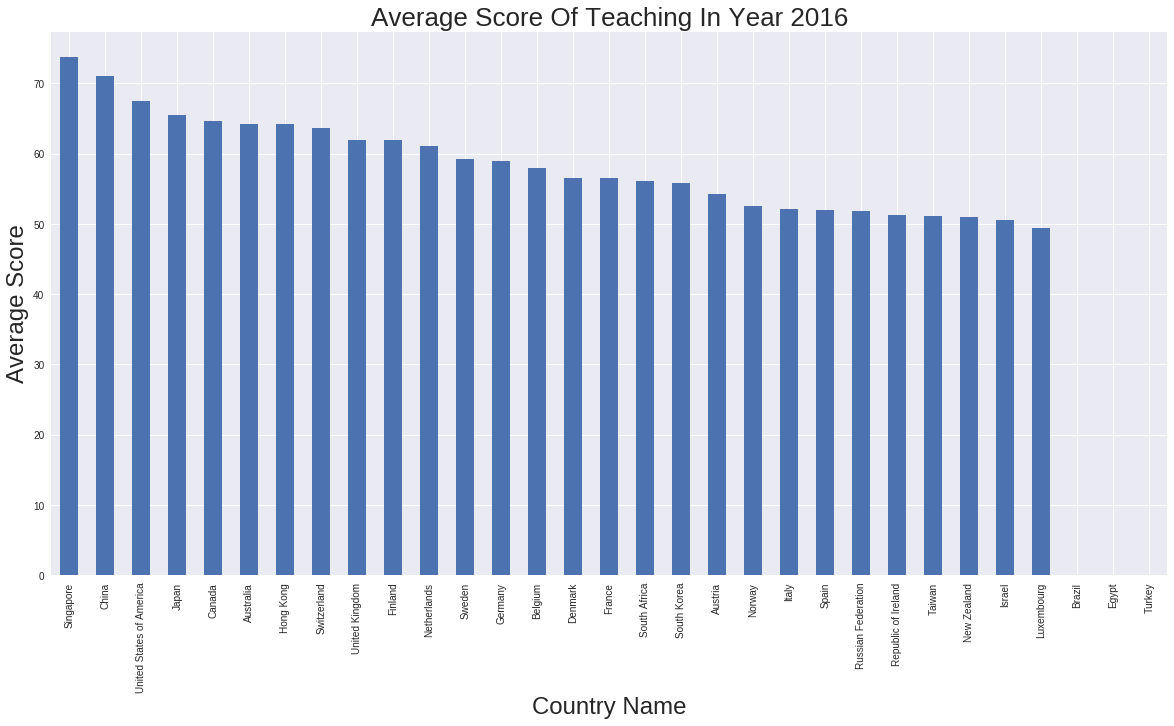

In [121]:
loop_year('teaching')

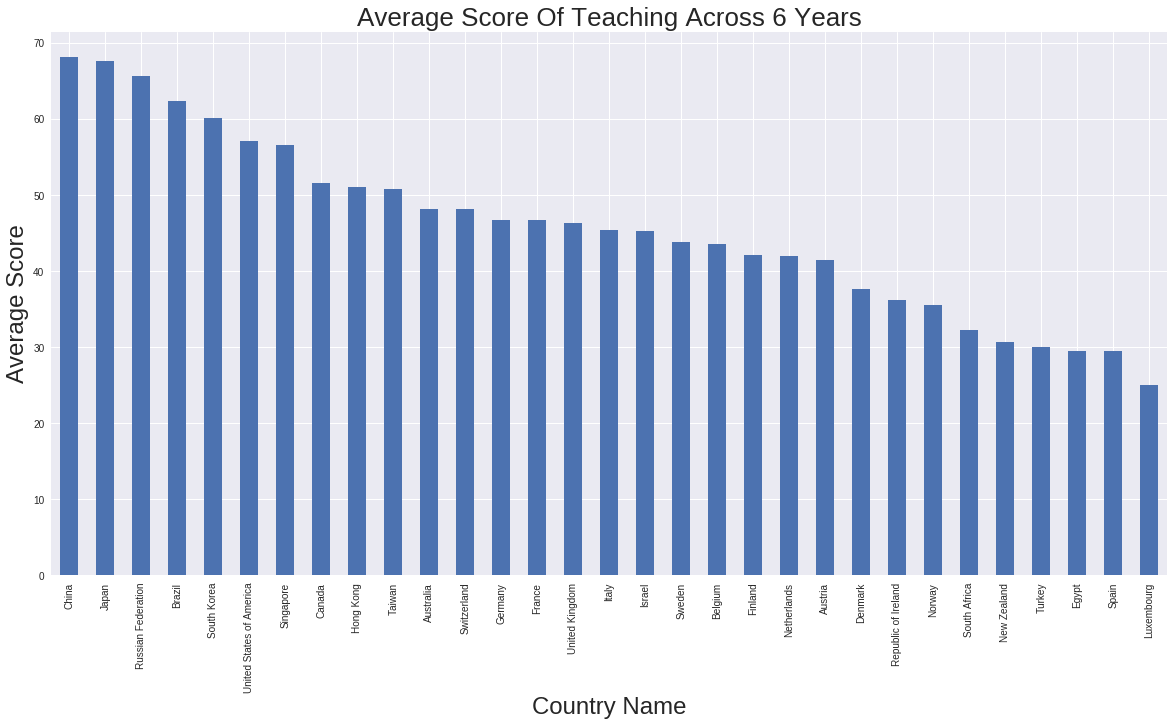

In [140]:
bar_indicator('teaching')

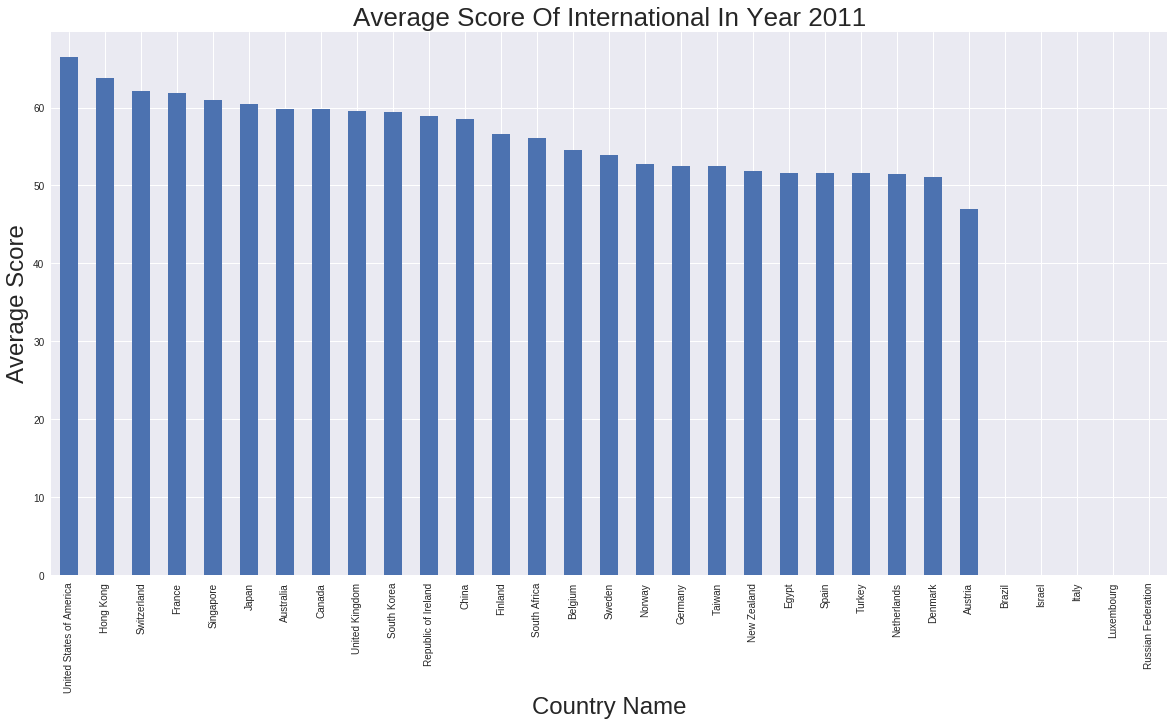

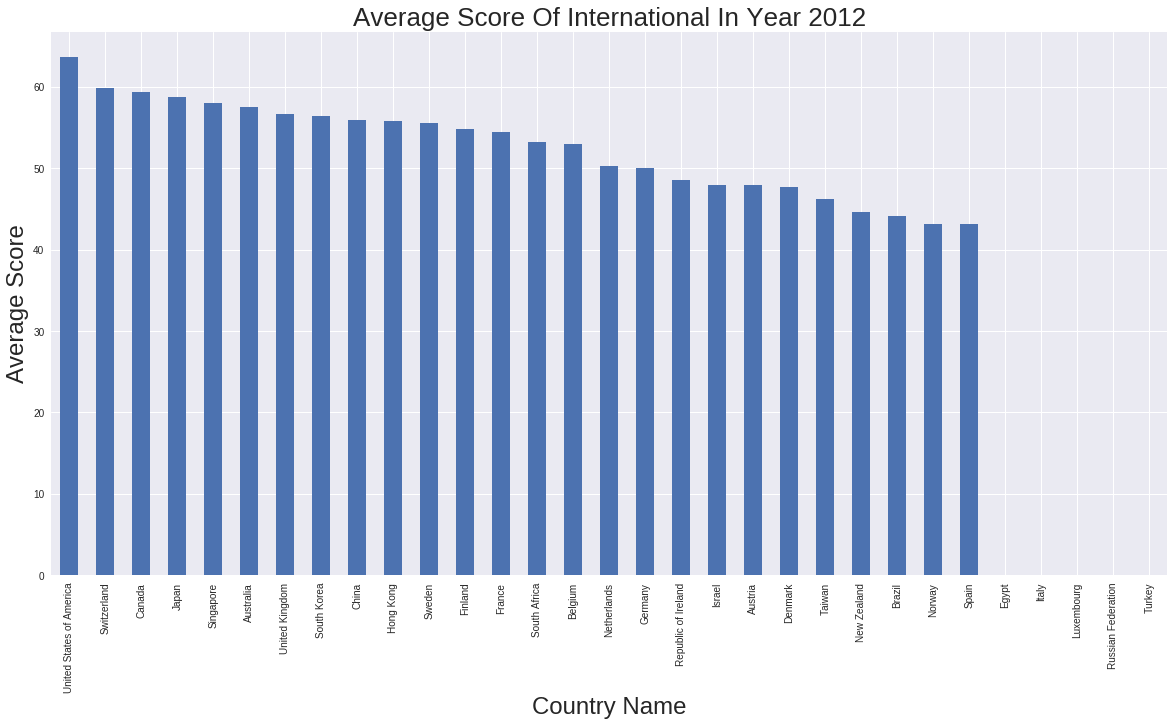

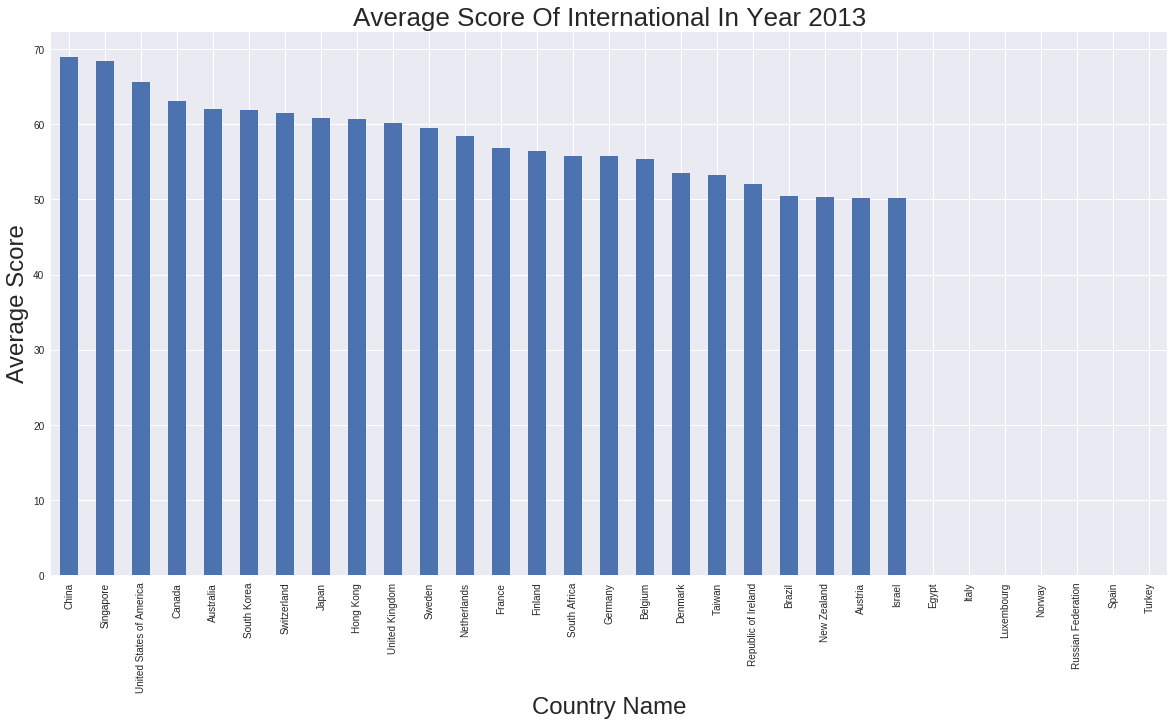

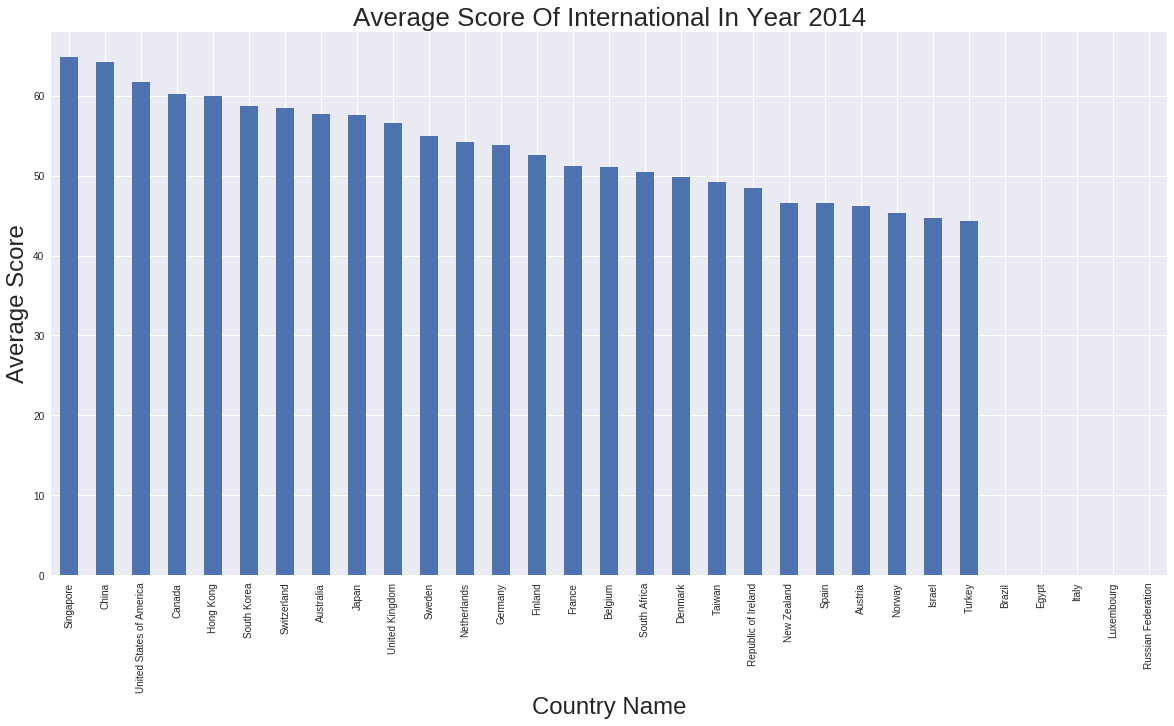

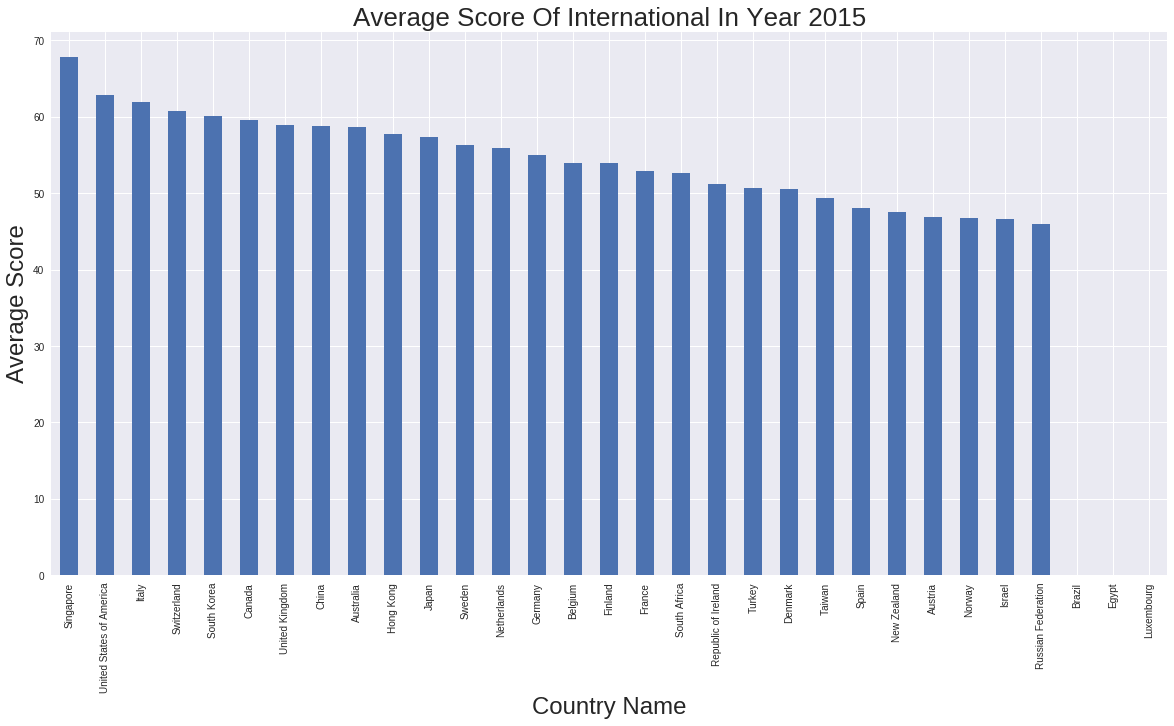

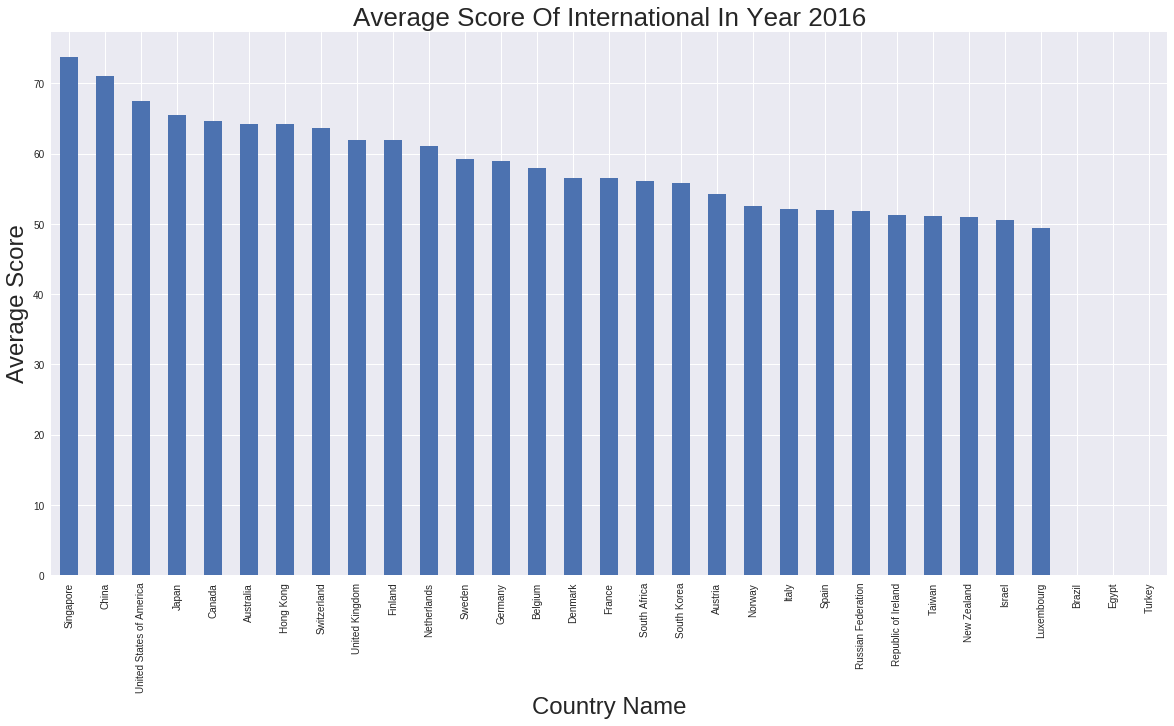

In [122]:
loop_year('international')

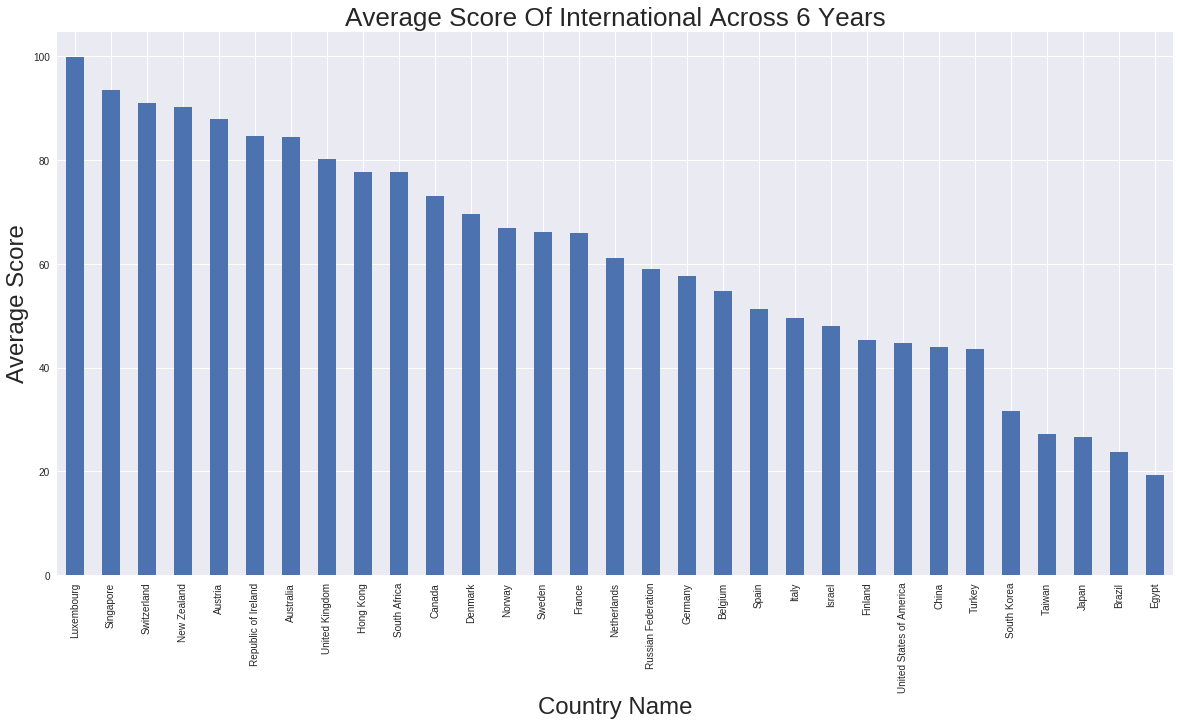

In [136]:
bar_indicator('international')

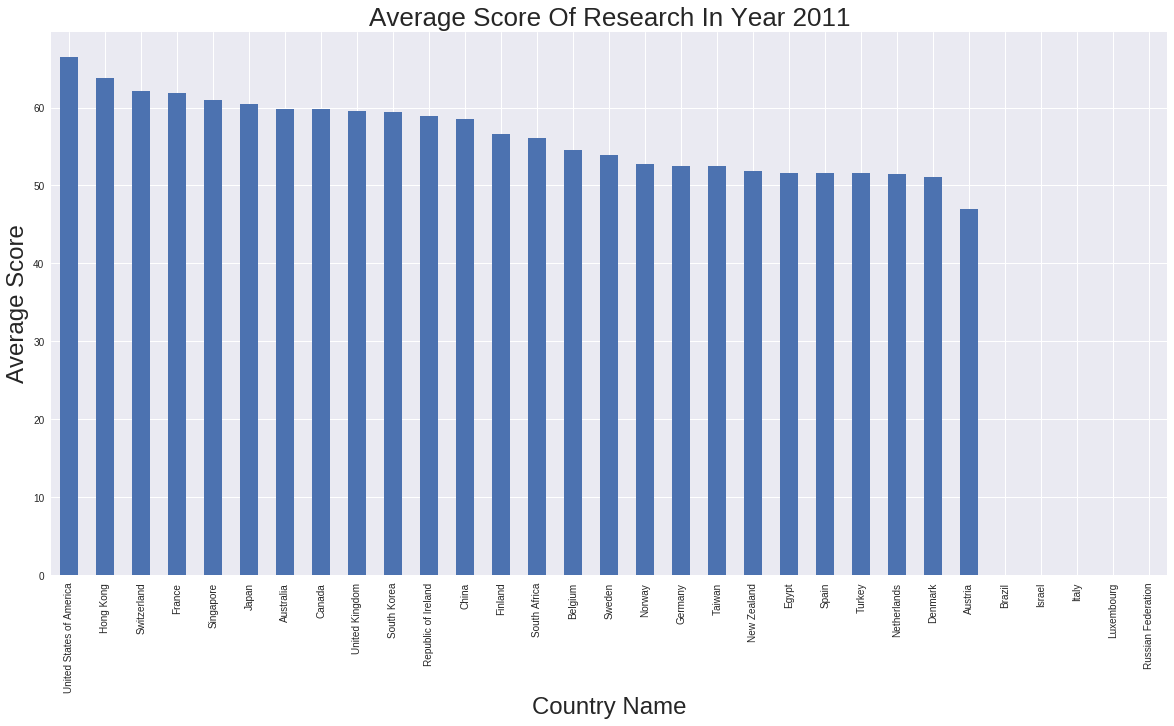

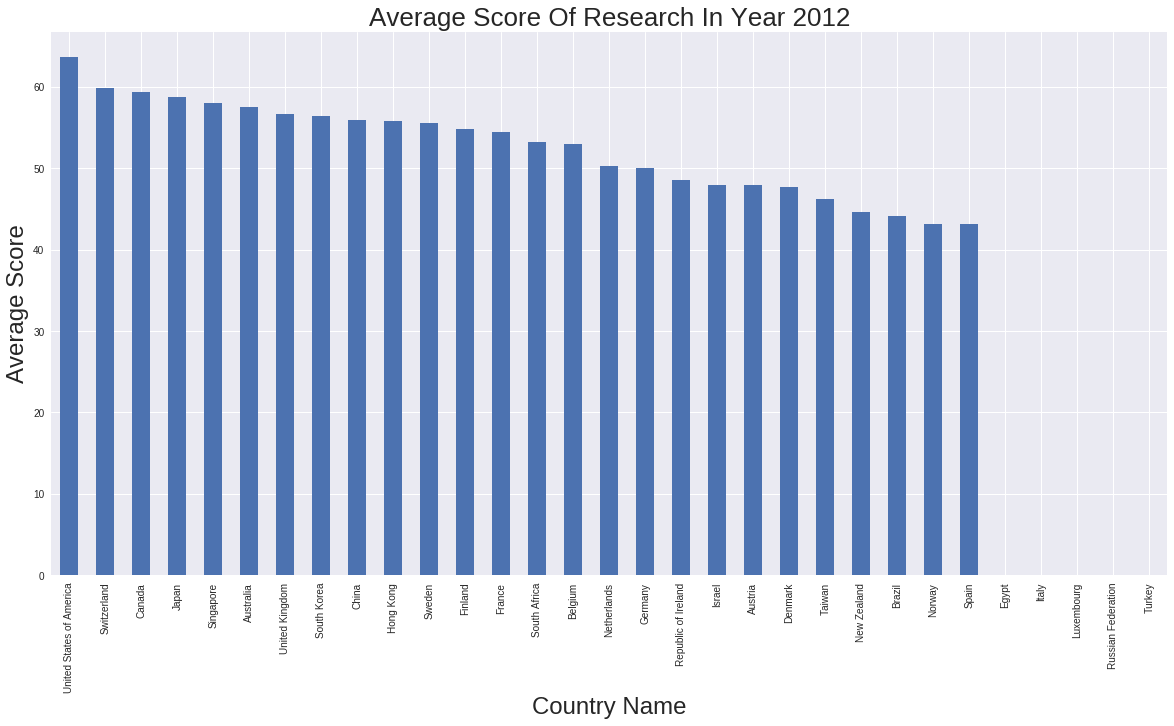

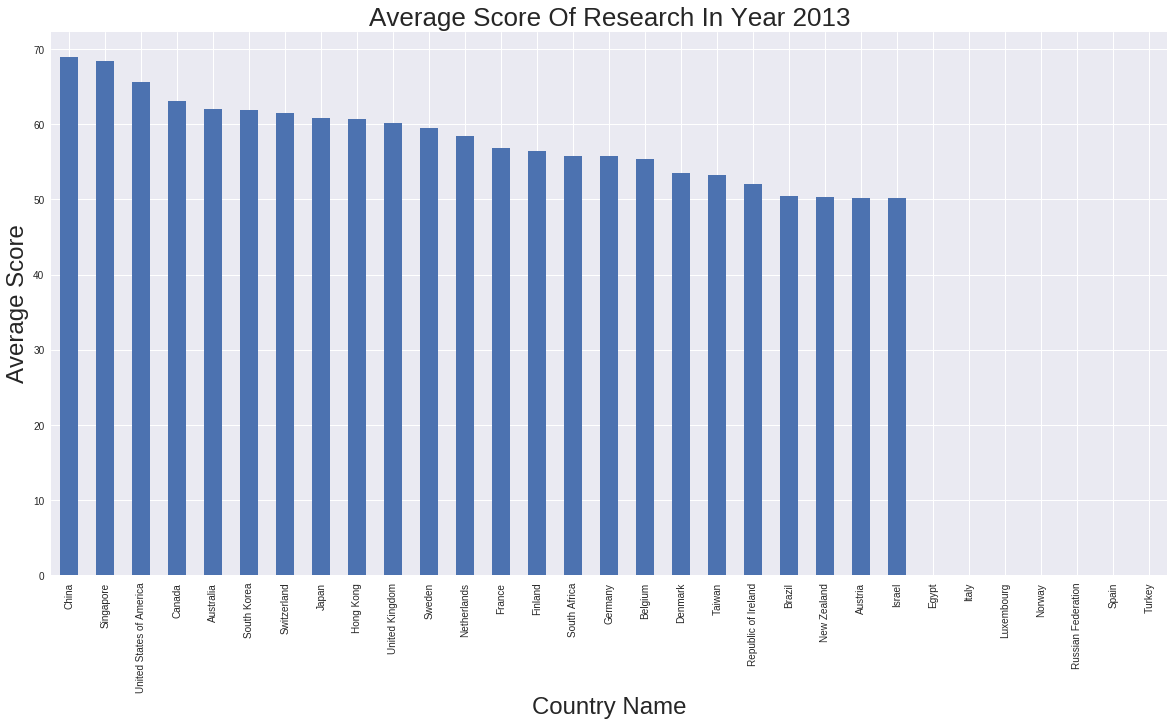

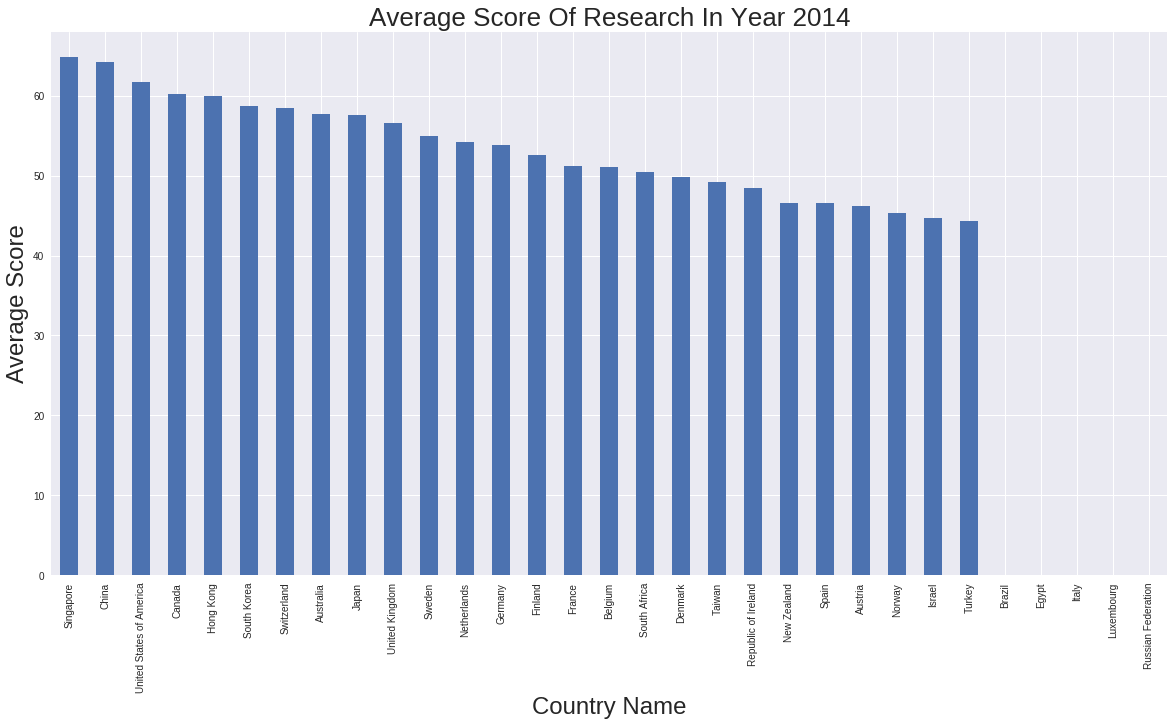

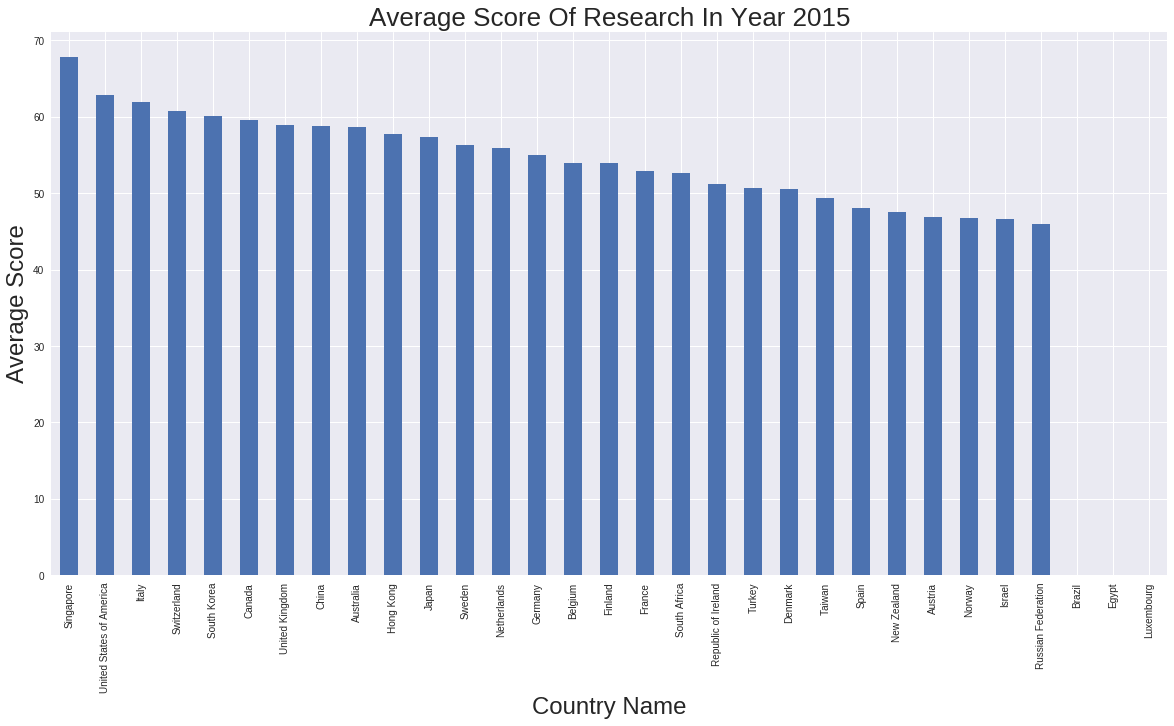

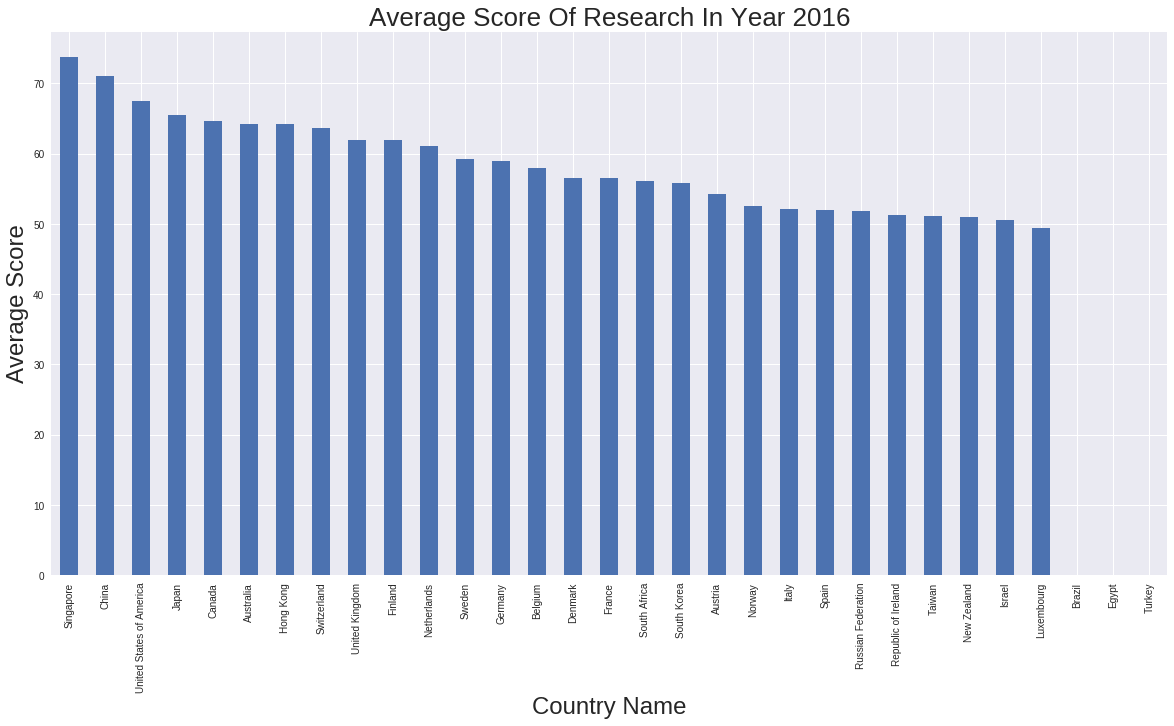

In [123]:
loop_year('research')

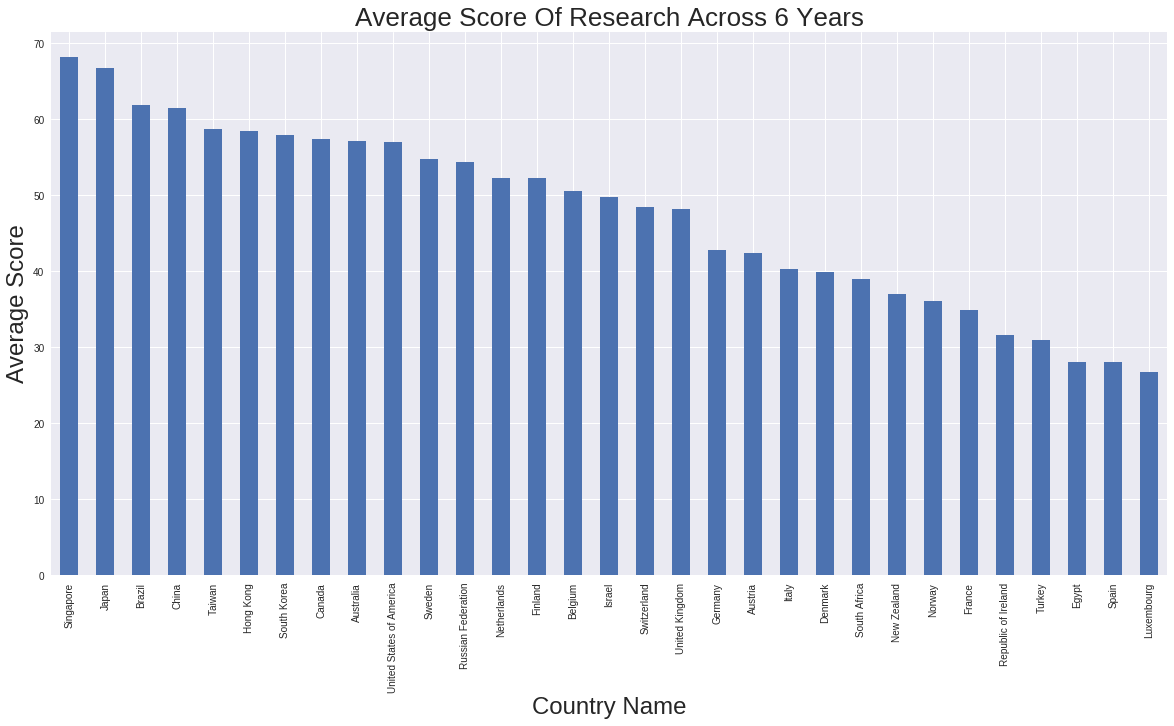

In [132]:
bar_indicator('research')

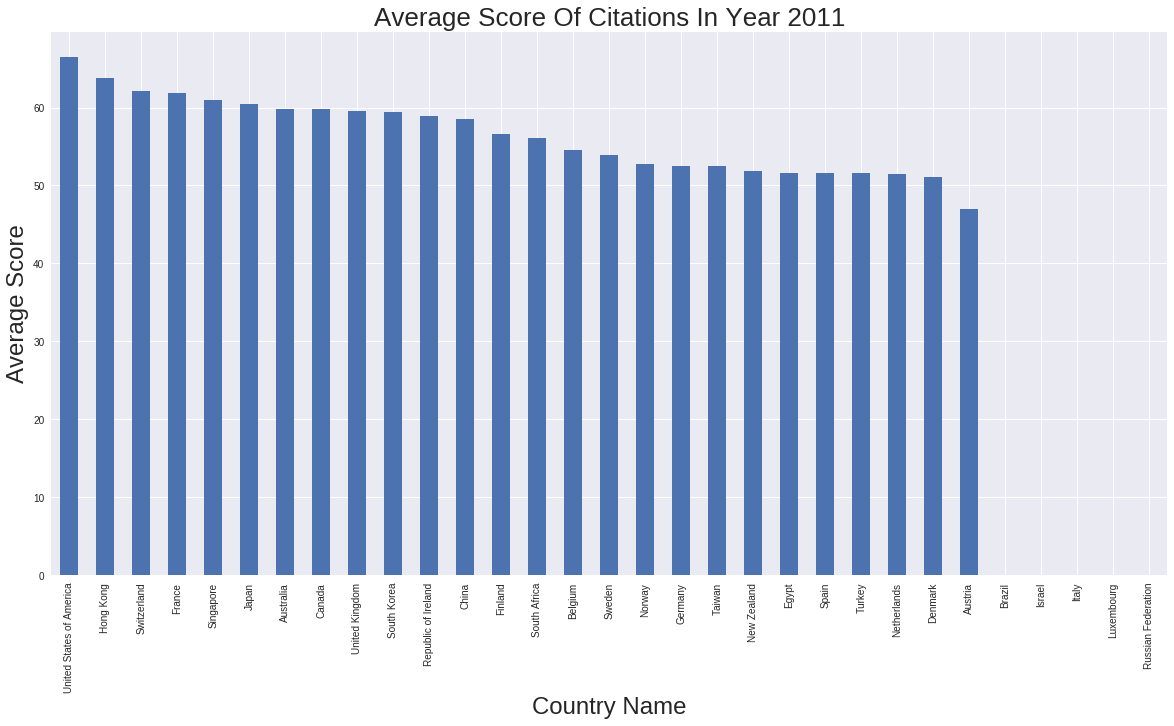

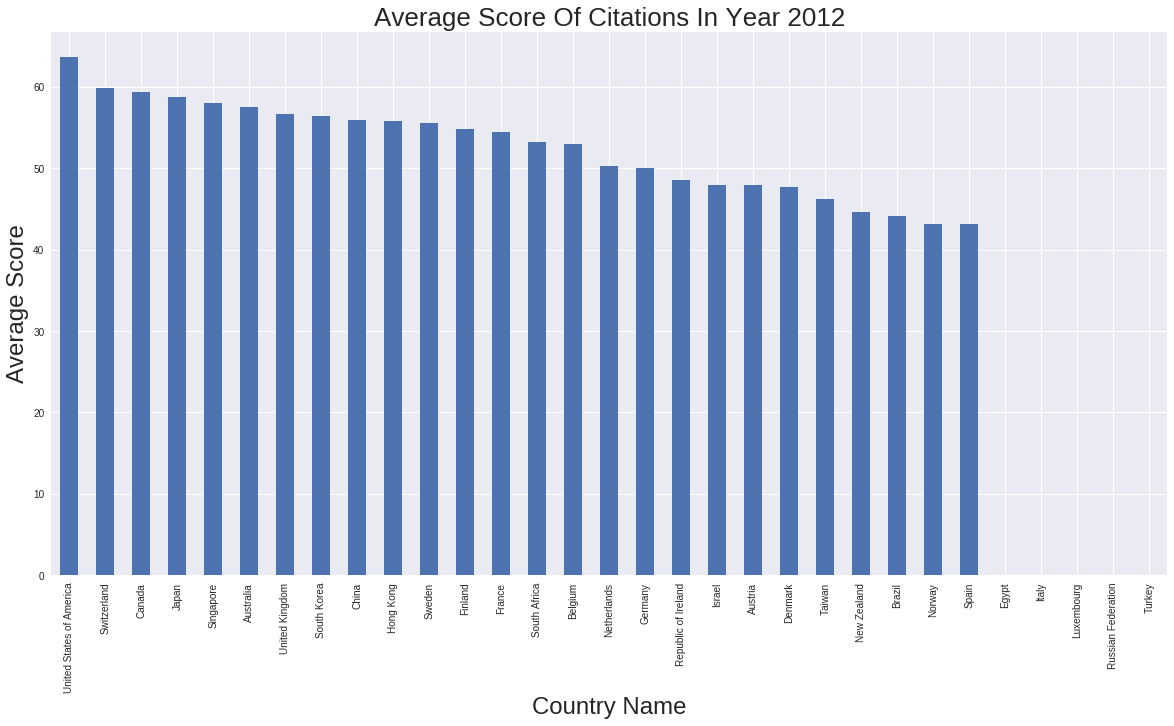

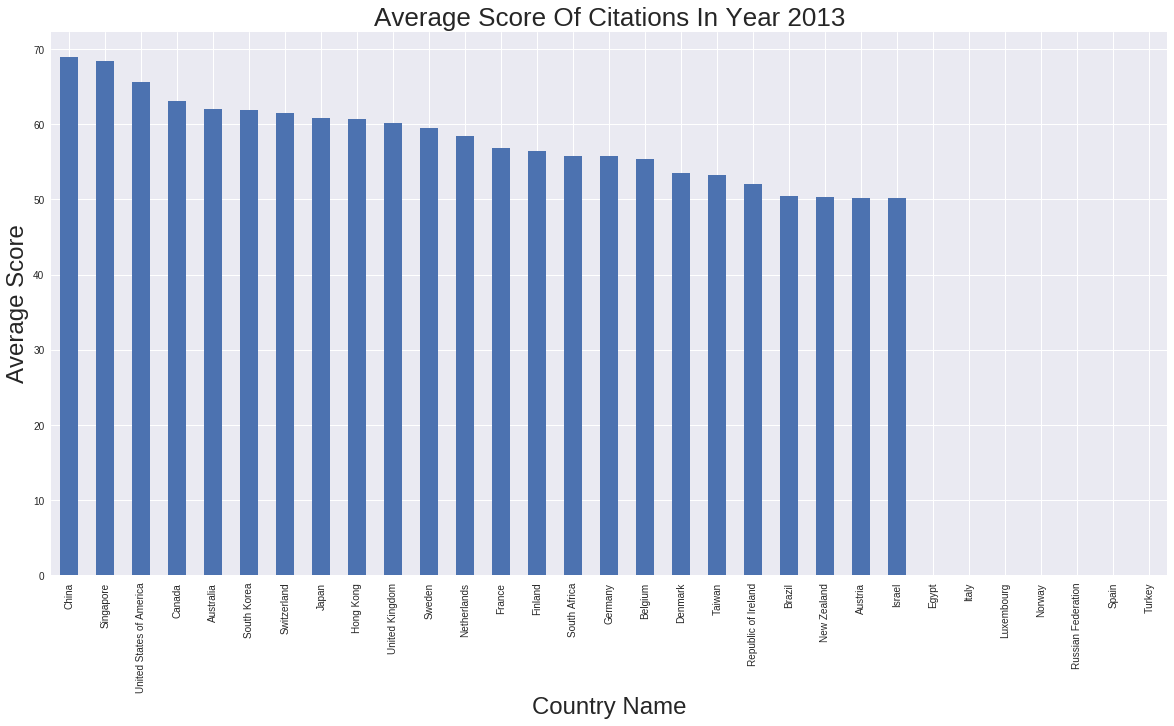

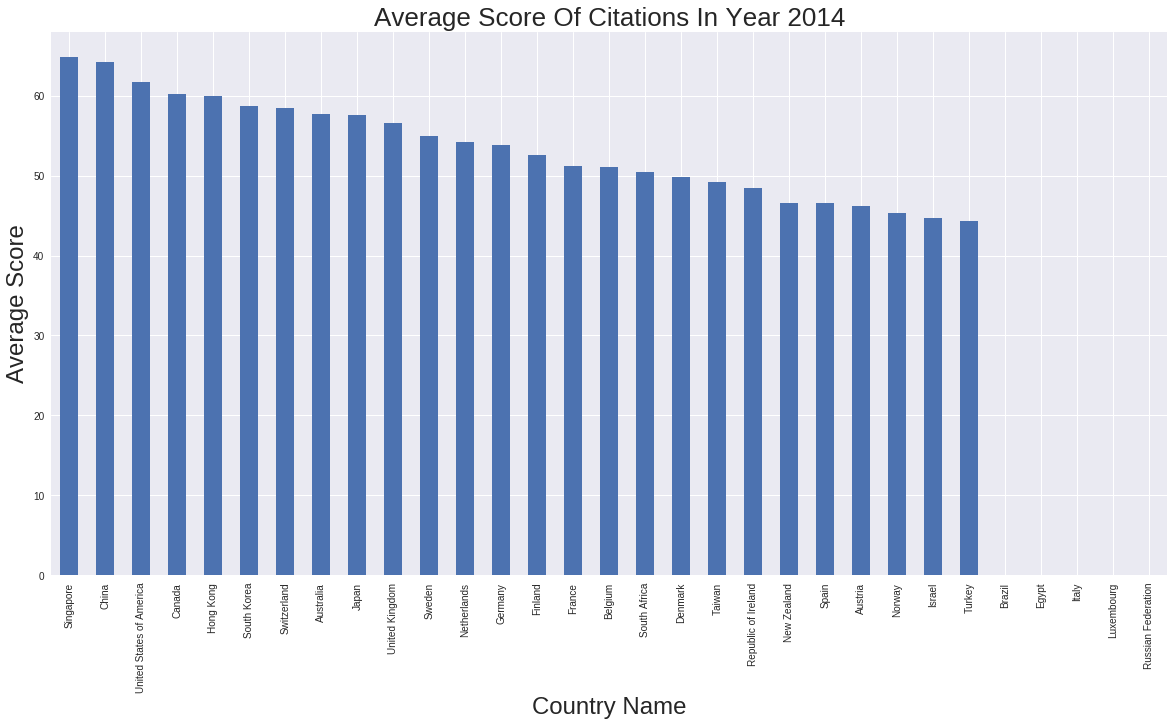

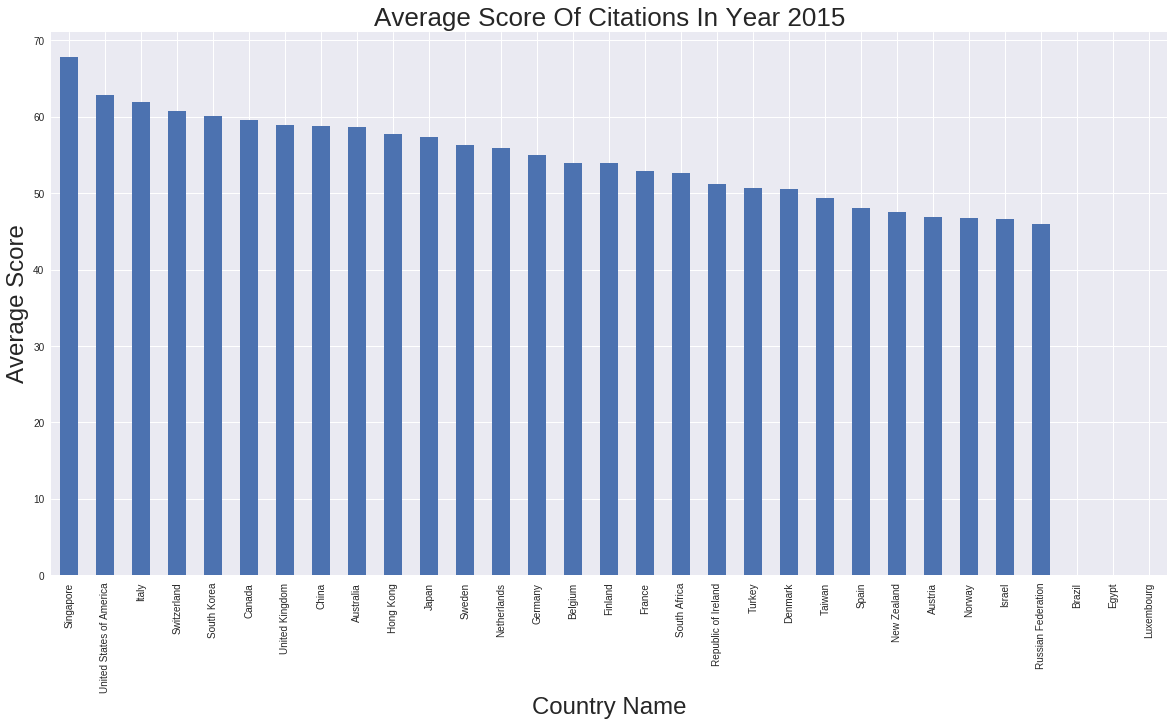

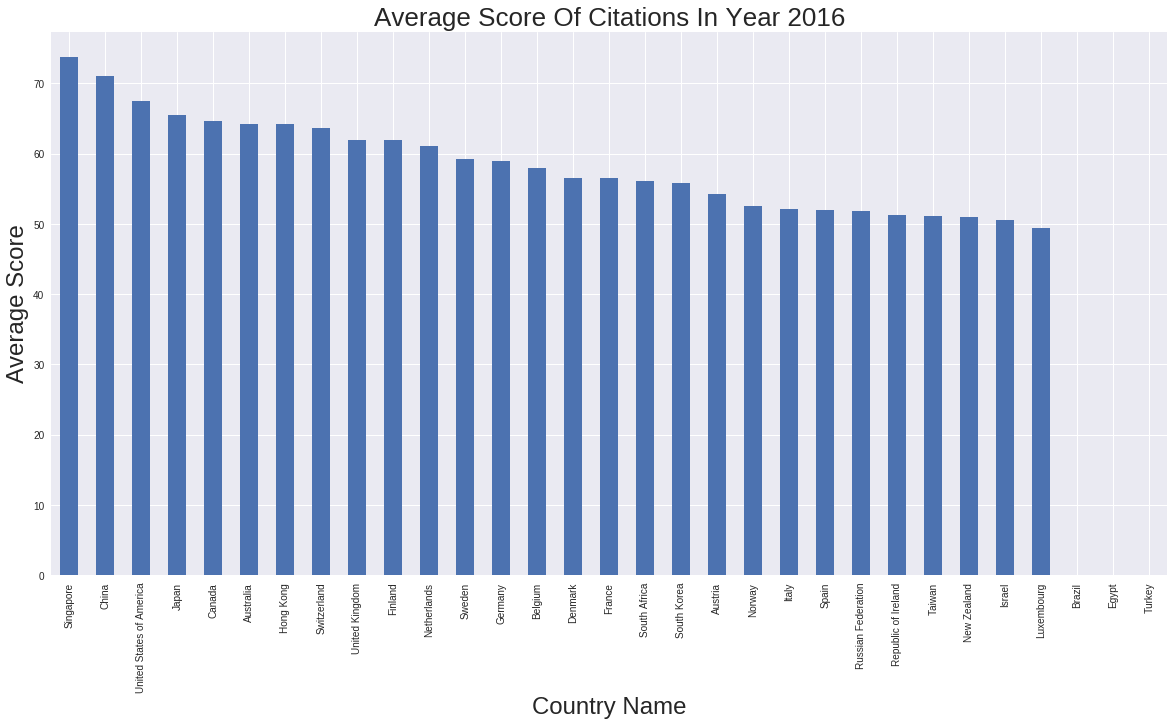

In [124]:
loop_year('citations')

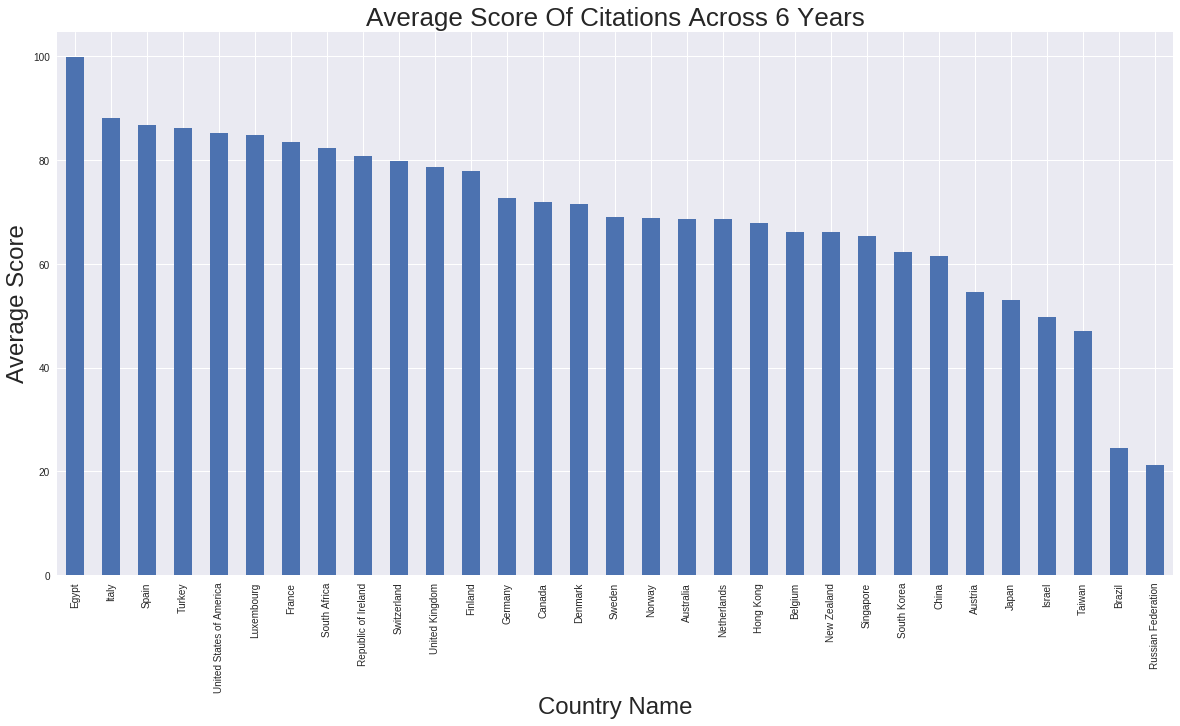

In [133]:
bar_indicator('citations')

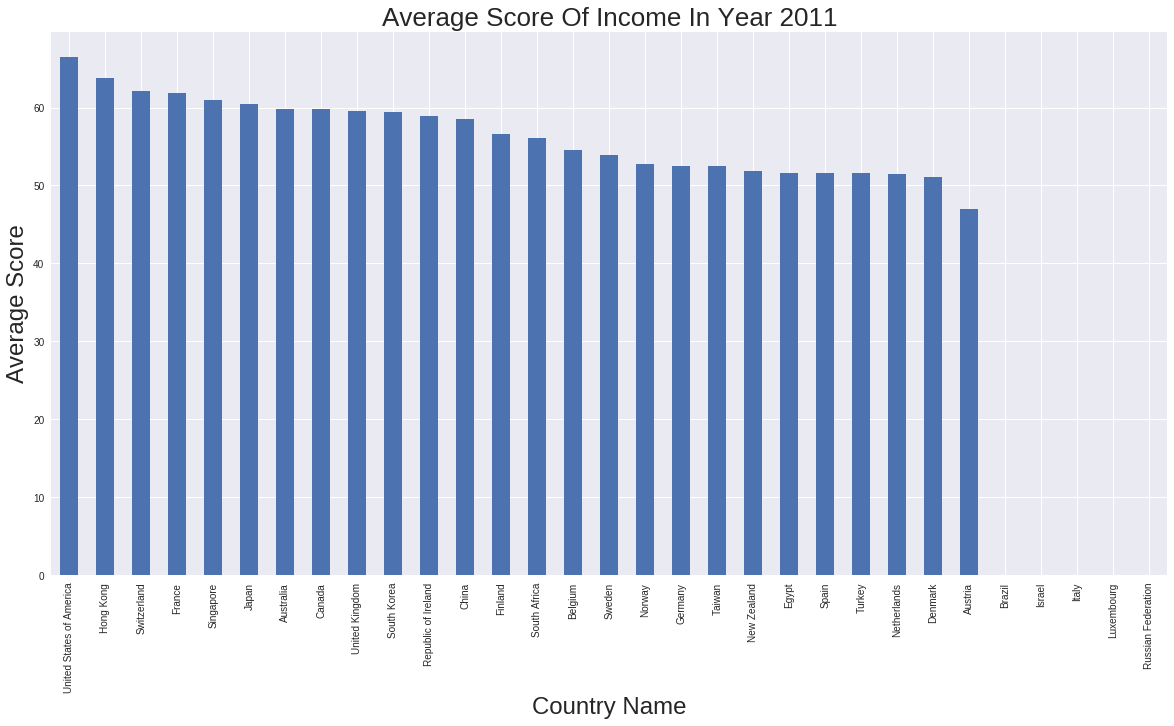

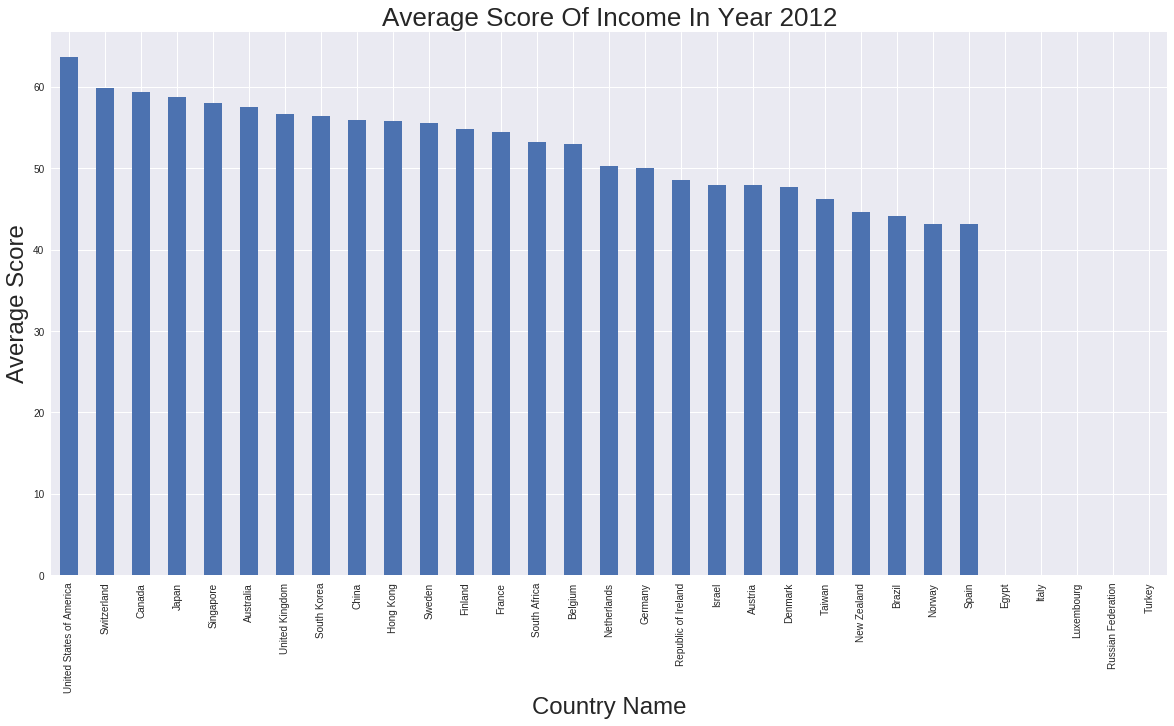

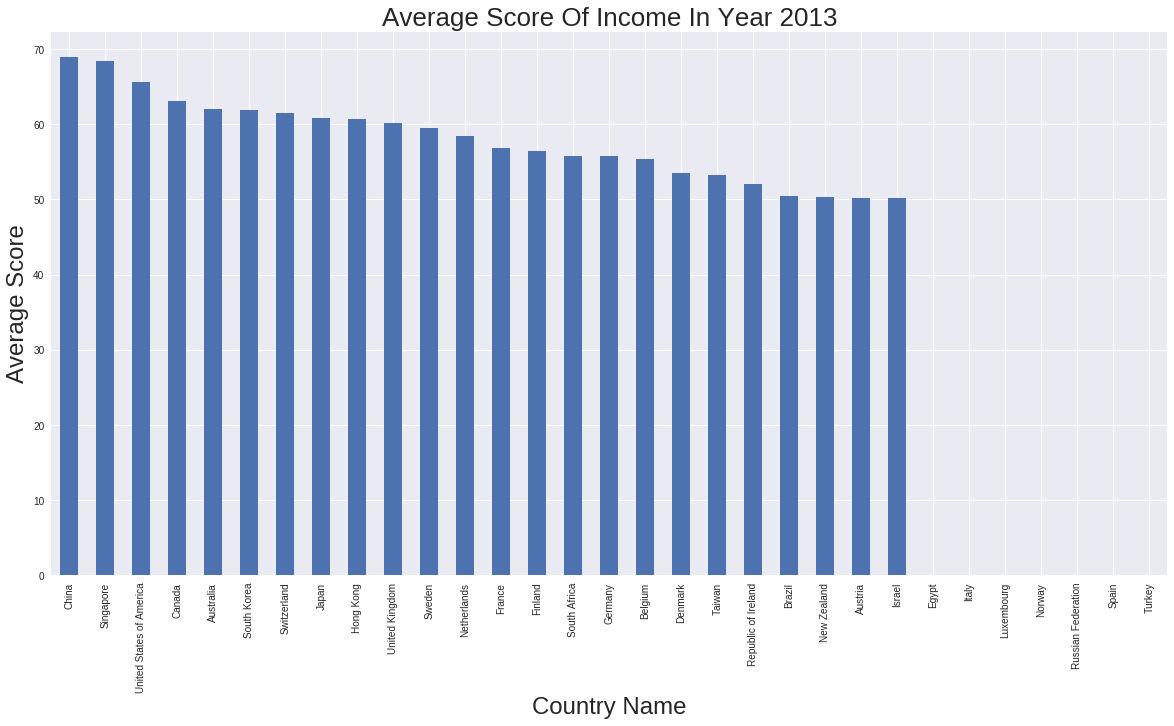

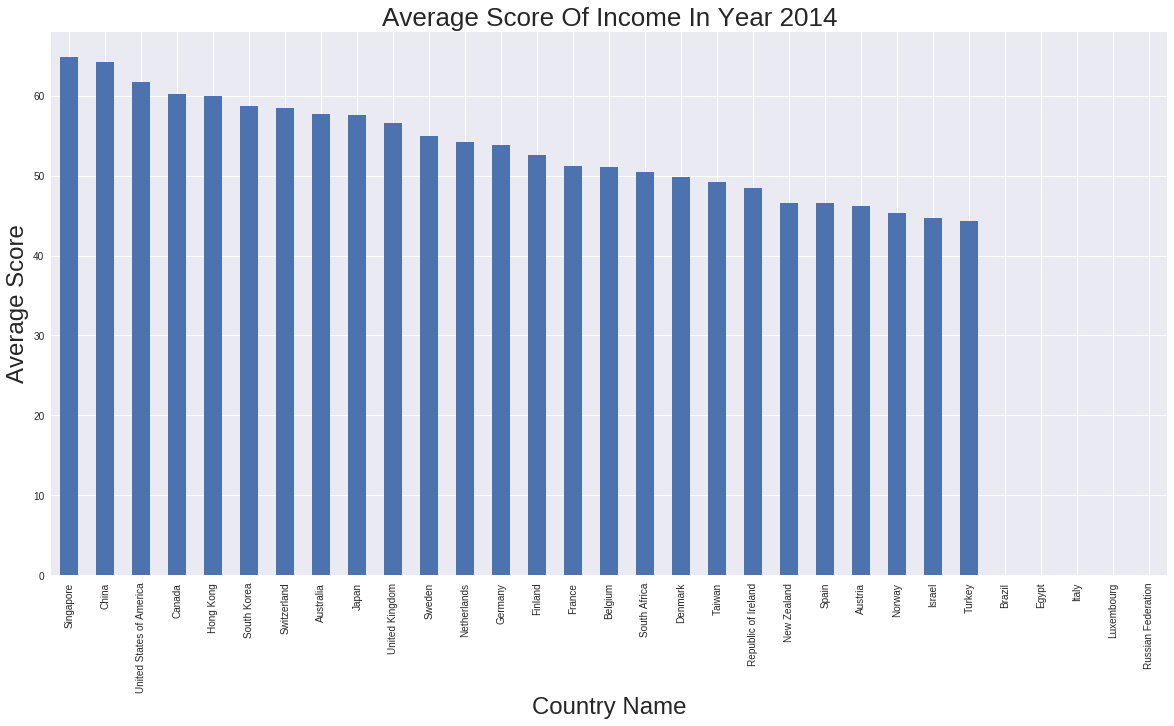

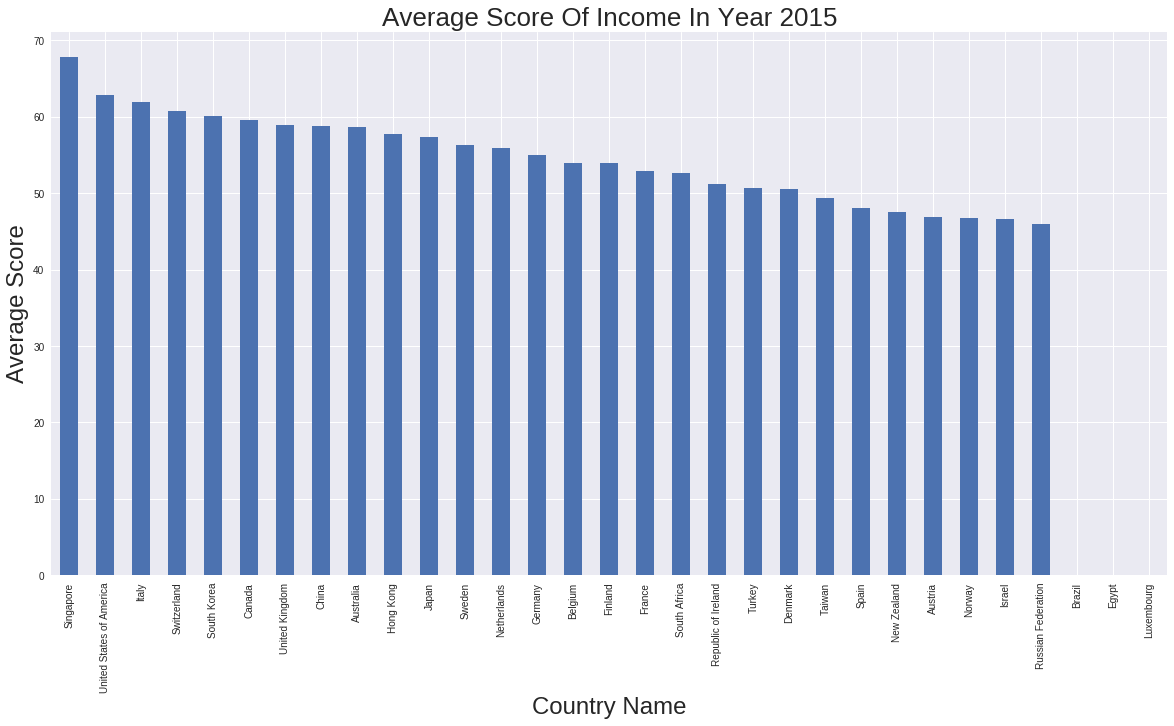

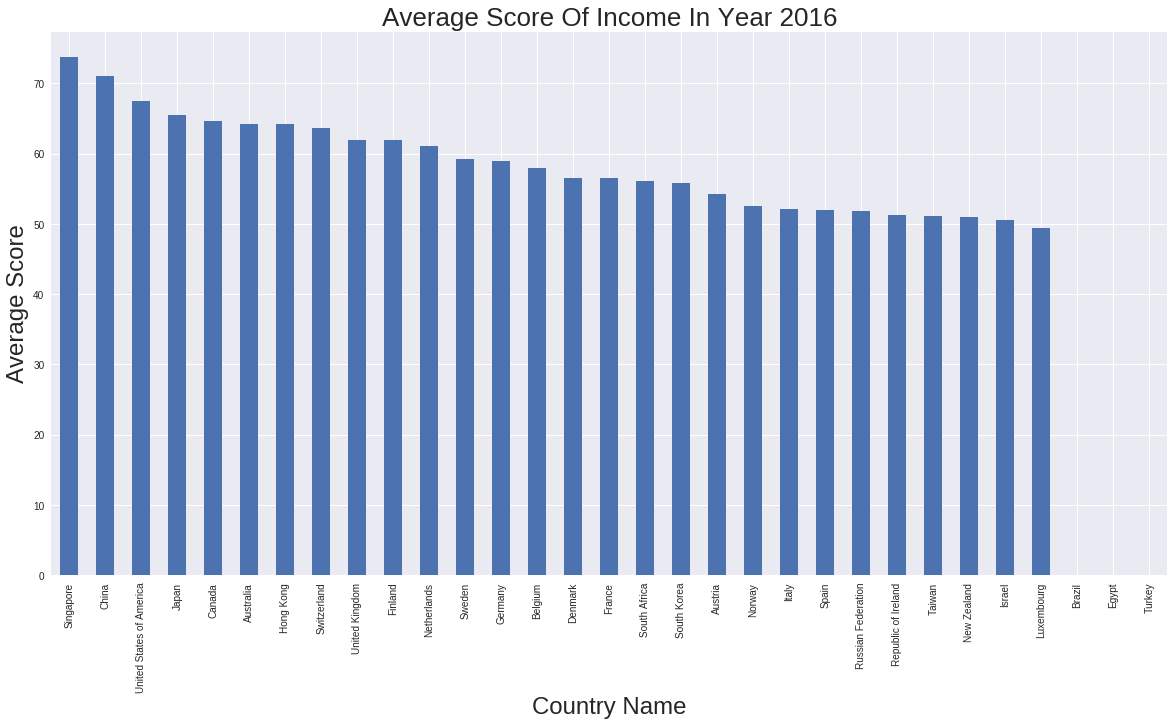

In [125]:
loop_year('income')

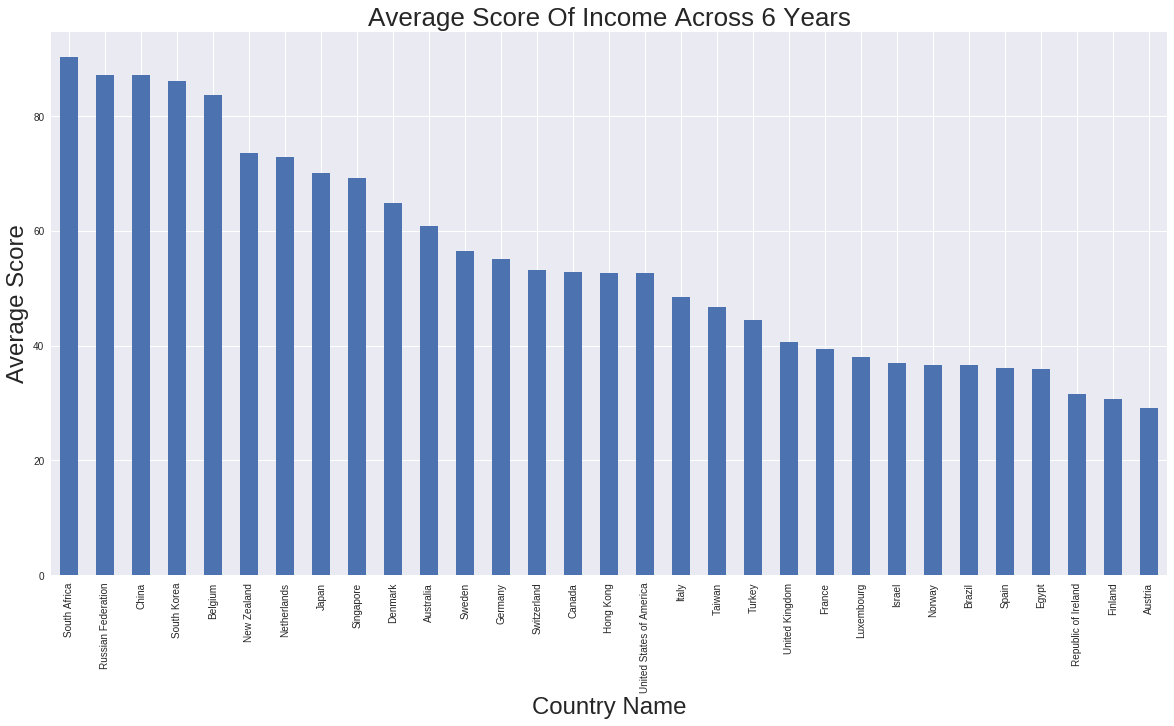

In [134]:
bar_indicator('income')

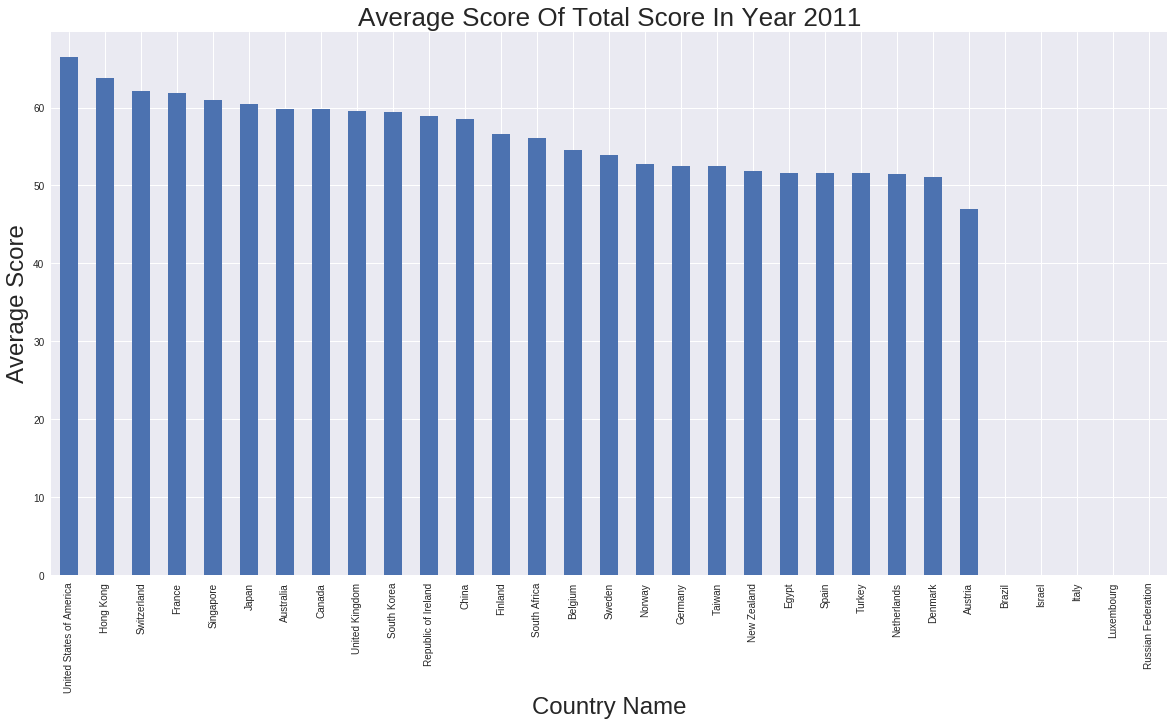

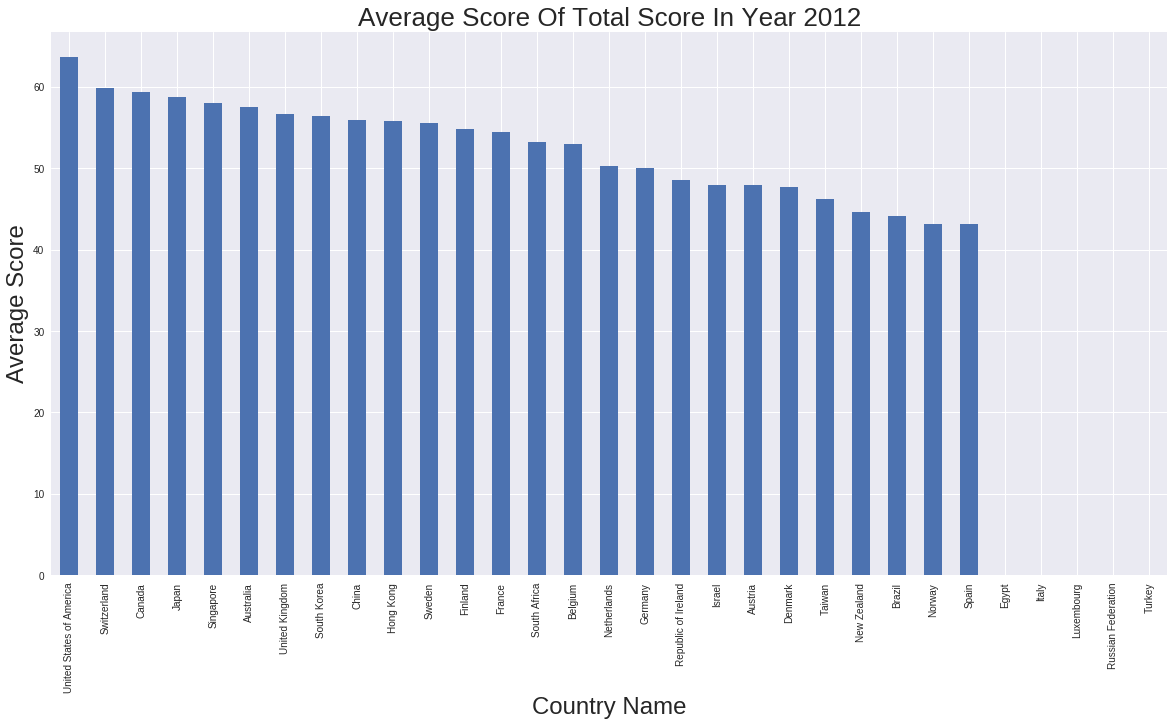

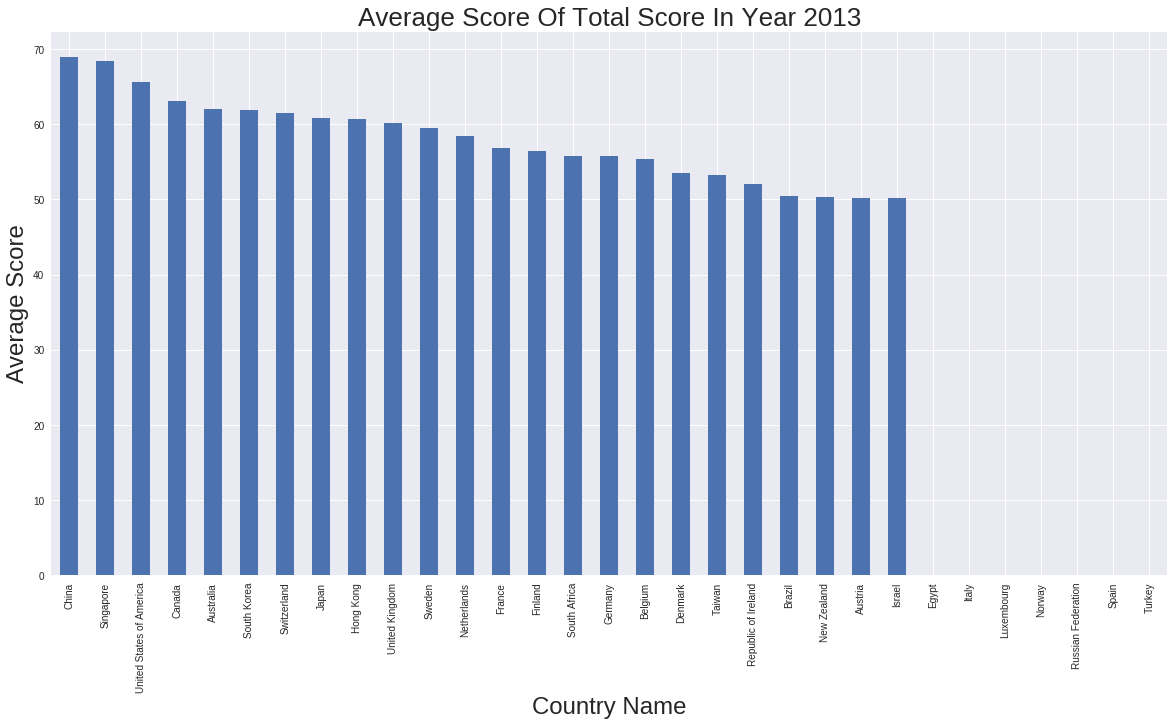

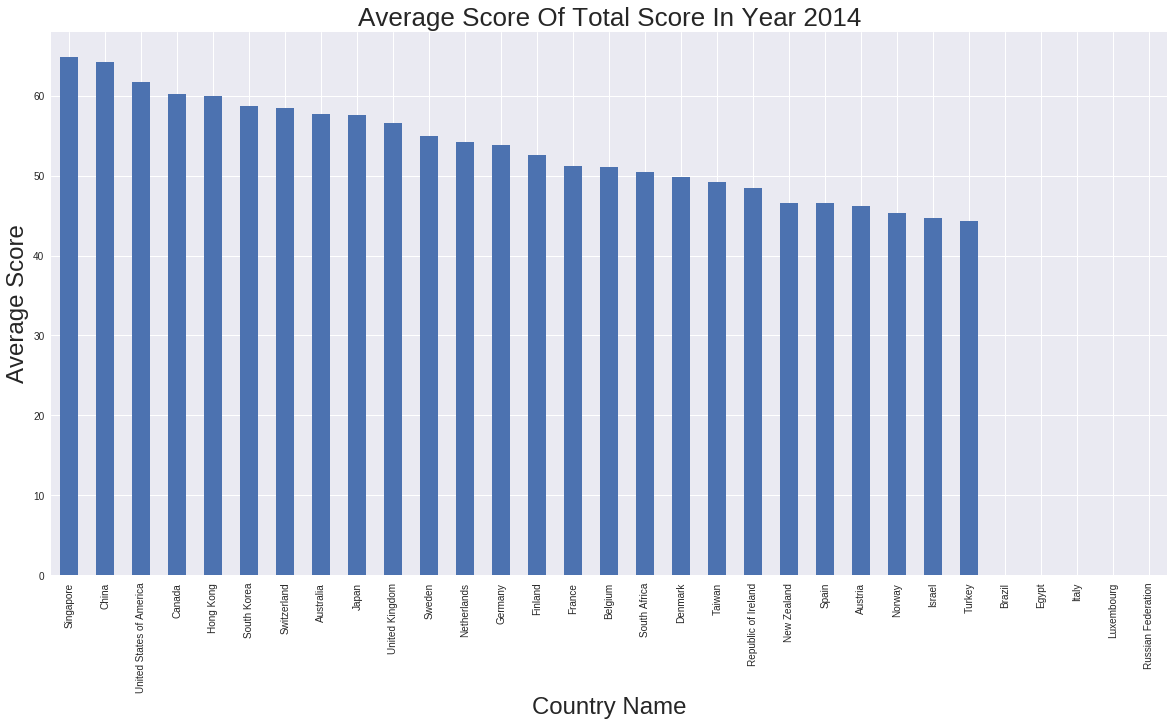

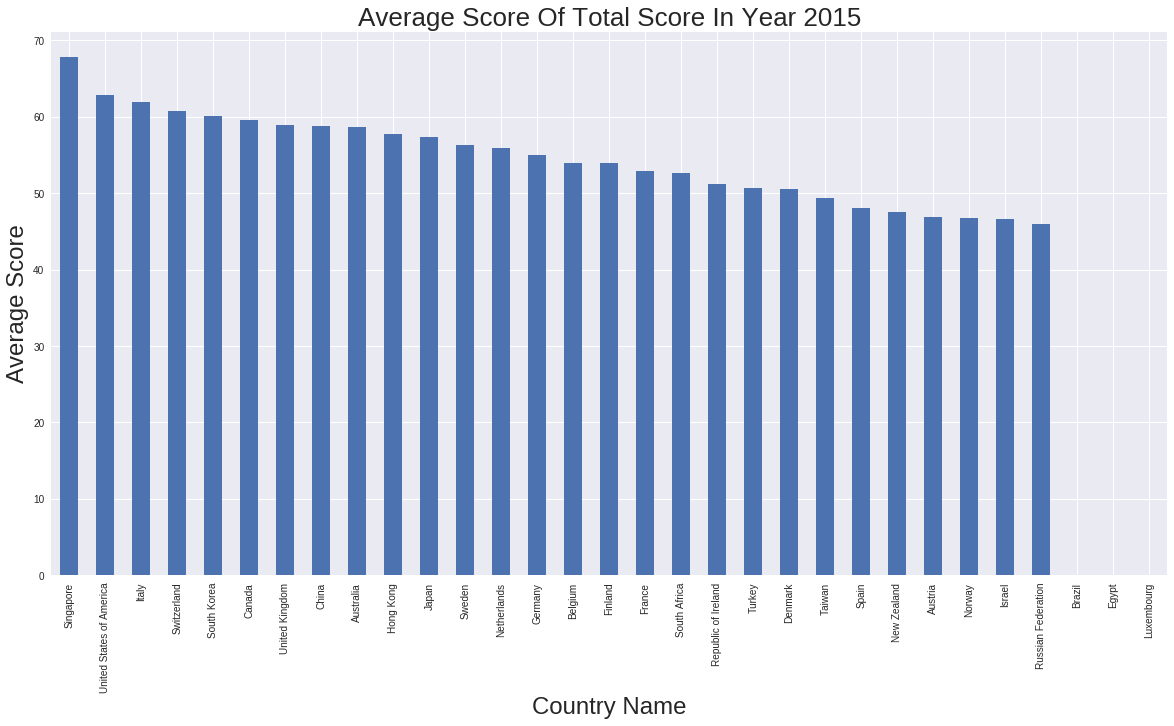

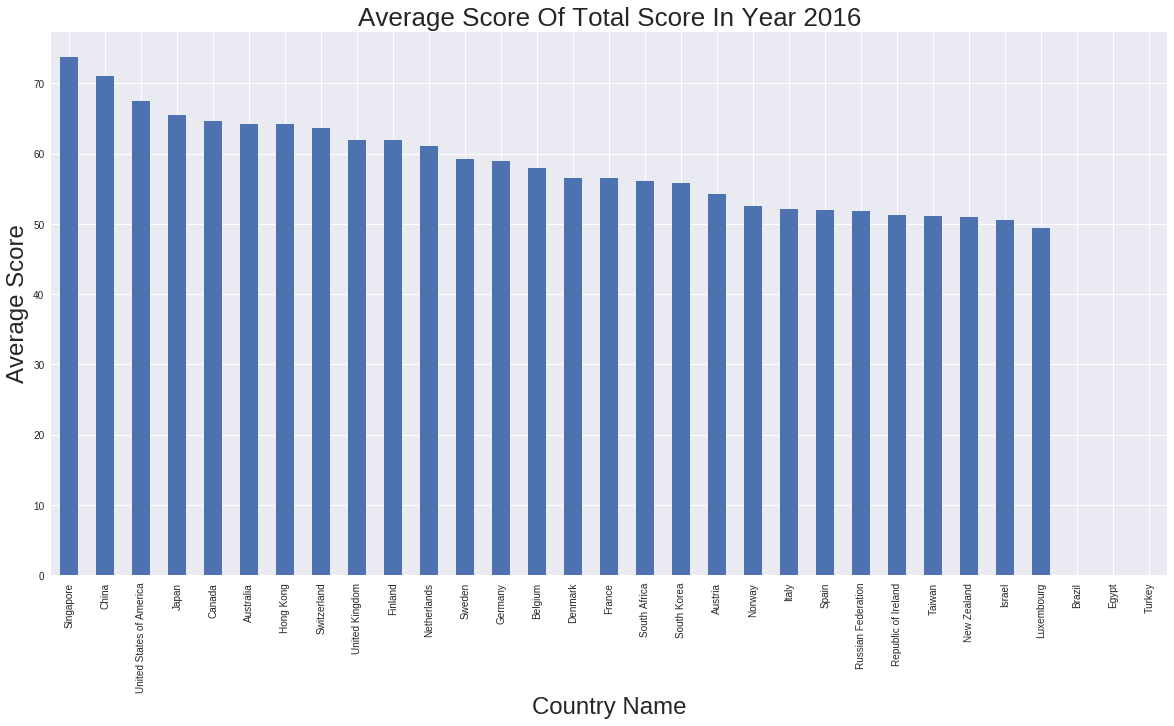

In [116]:
loop_year('total_score')

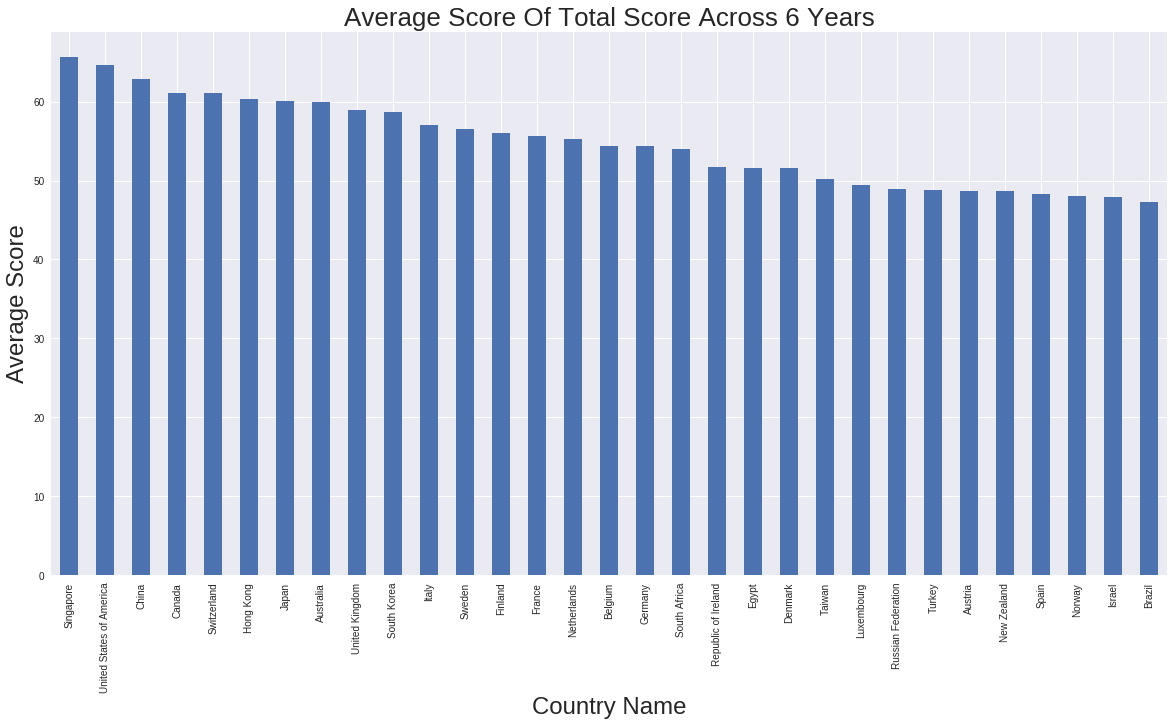

In [135]:
bar_indicator('total_score')

The same trend for five indicators: The average indicator scores of Asian countries (including China, Singapore, Japan and Sourth Korea) are increasing and exceeding some western countries.

## Histgram

Define a function to draw one histgram with bins=100, norminalised.

In [148]:
def hist(df, column):
    plt.hist(df[column].dropna(), bins=100, normed=1, facecolor='blue')
    if '_' in column:
        column = column.replace('_', ' ')
    plt.xlabel(column.title(), fontsize = 24)
    plt.ylabel('Probability', fontsize = 24)
    plt.title('{} Distribution'.format(column).title(), fontsize = 36)
    plt.grid(True)
    plt.show()

Use a for loop and function hist to draw histgrams for every column which has number in the data.

In [149]:
def loop_plot(kind):
    for i in range(len(wur_data.columns)):
        column = wur_data.columns[i]
        if type(wur_data[column][0]) != str and column != 'year':
            kind(wur_data, column)

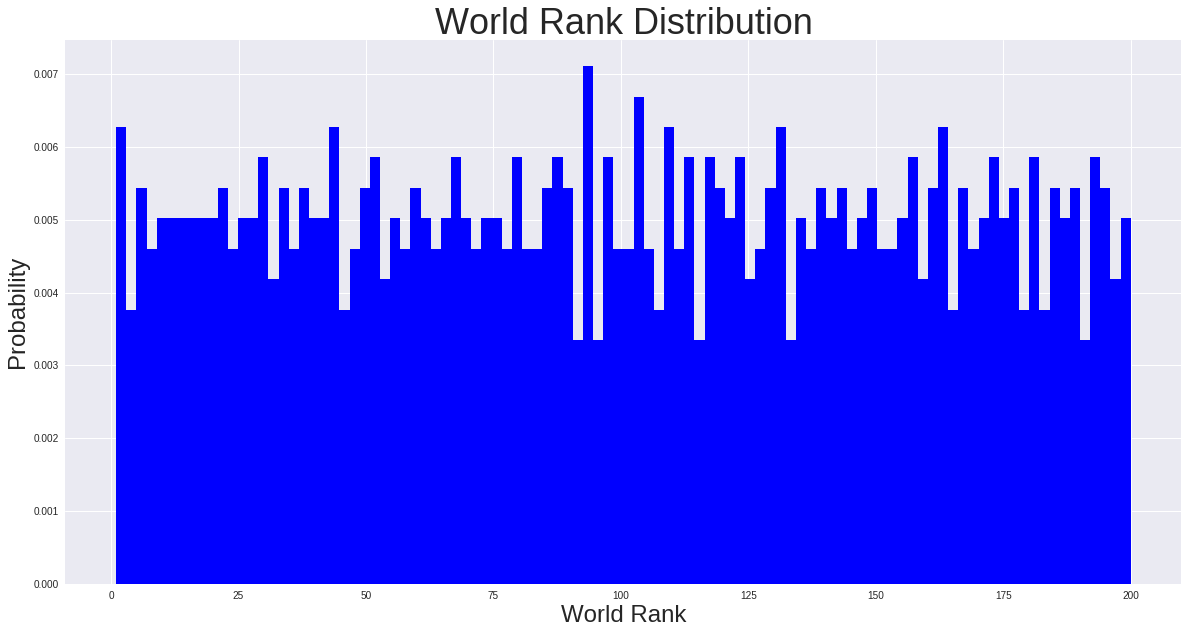

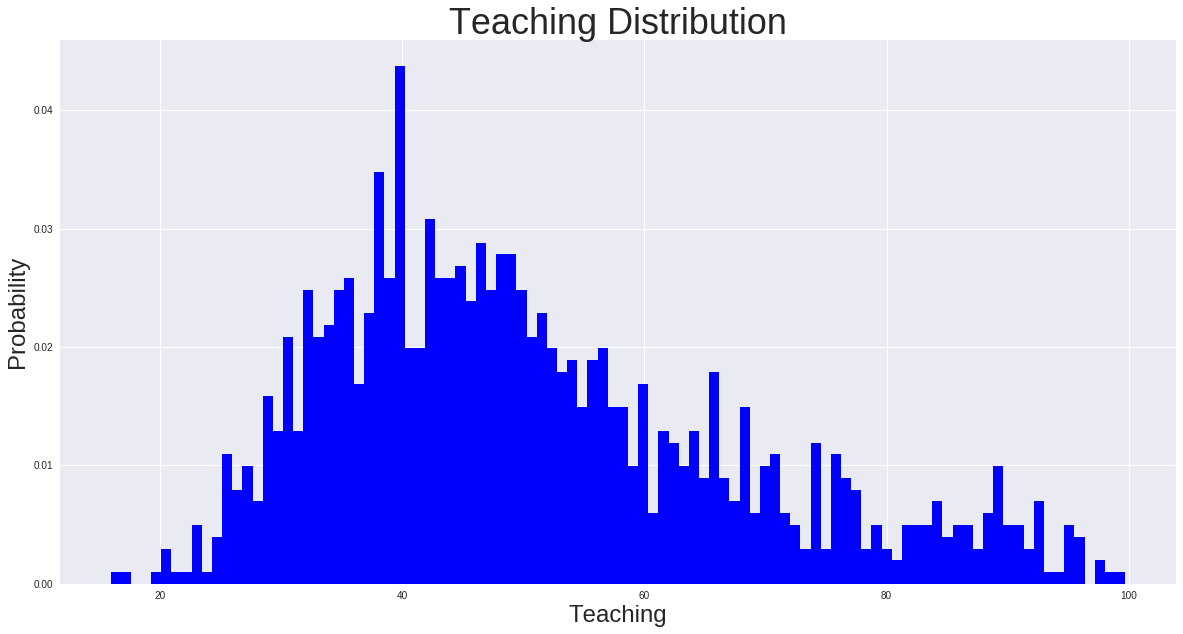

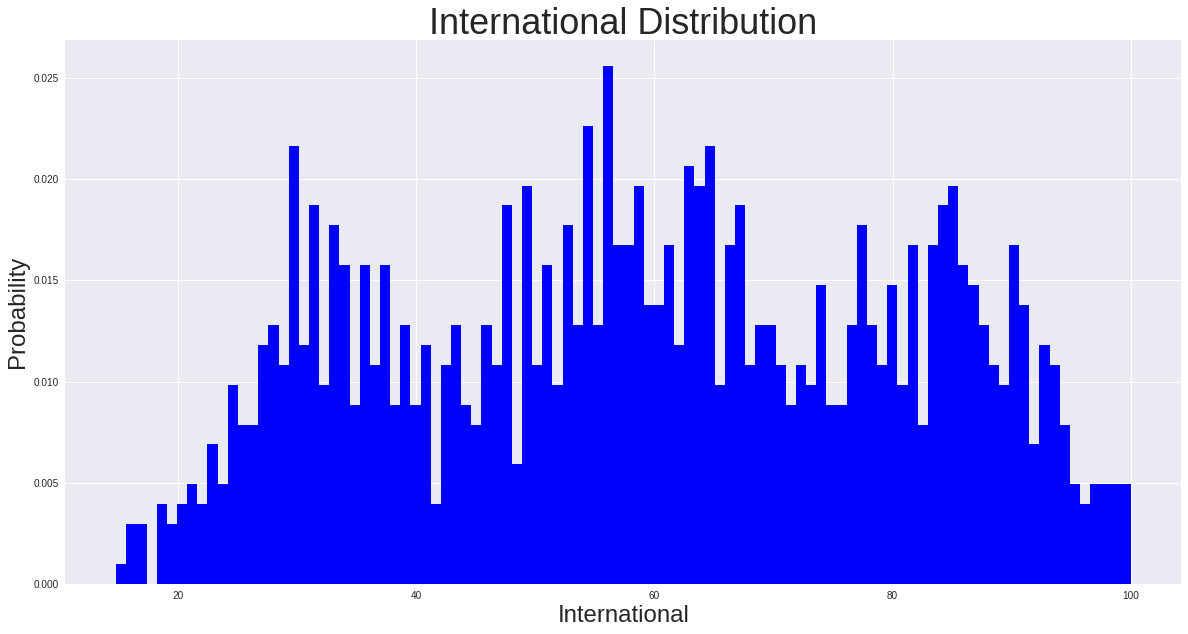

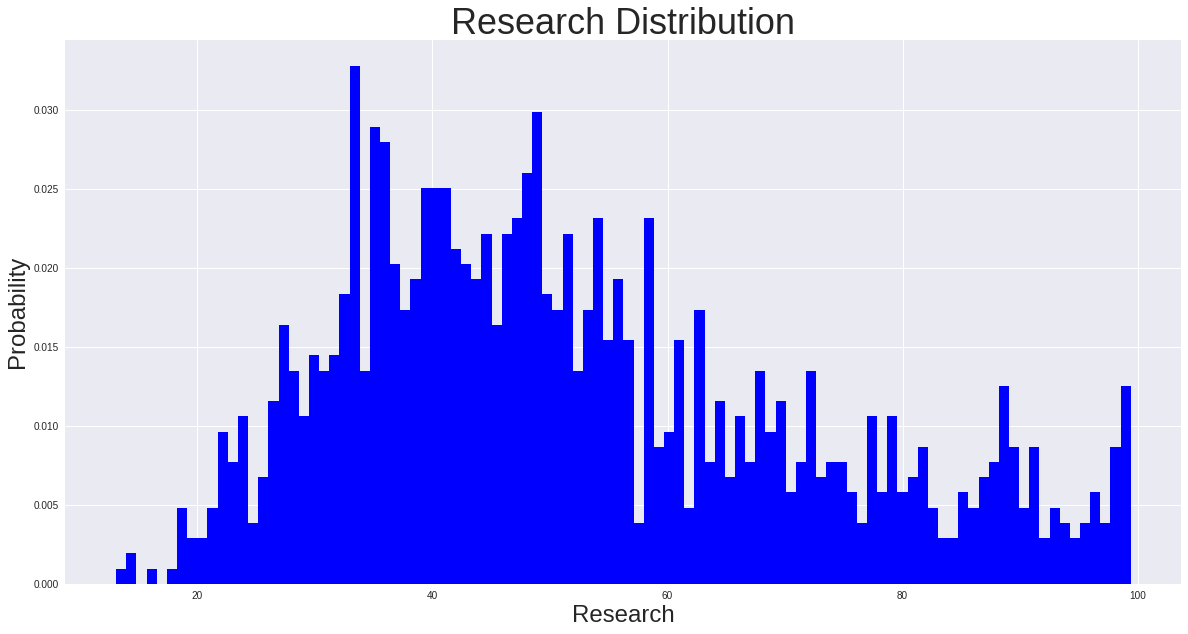

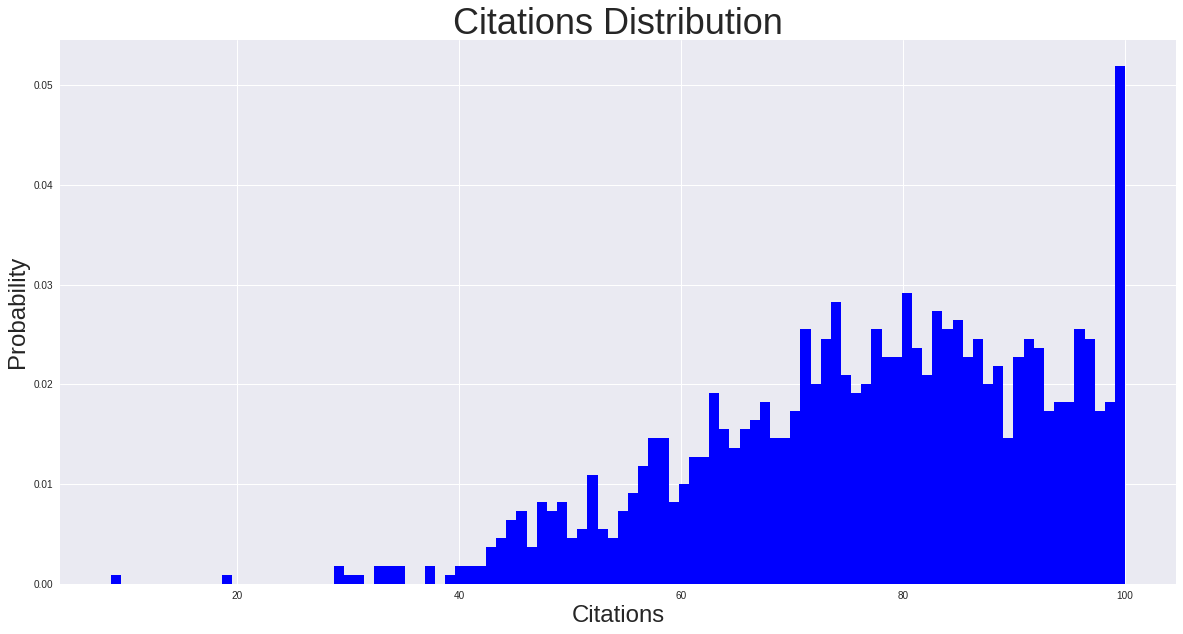

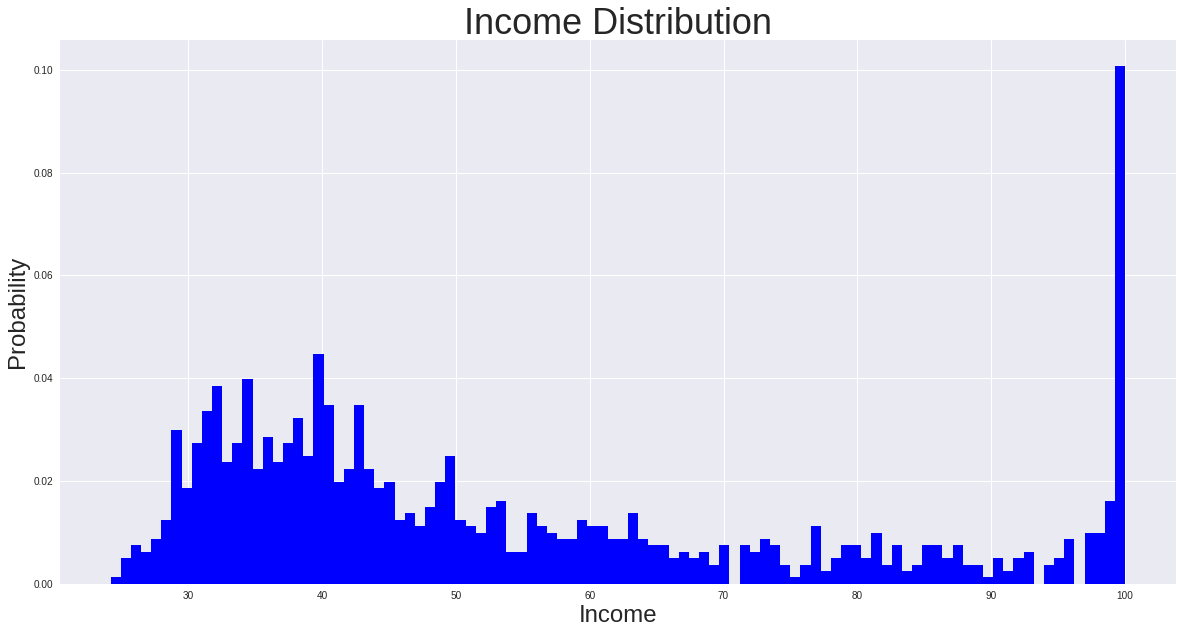

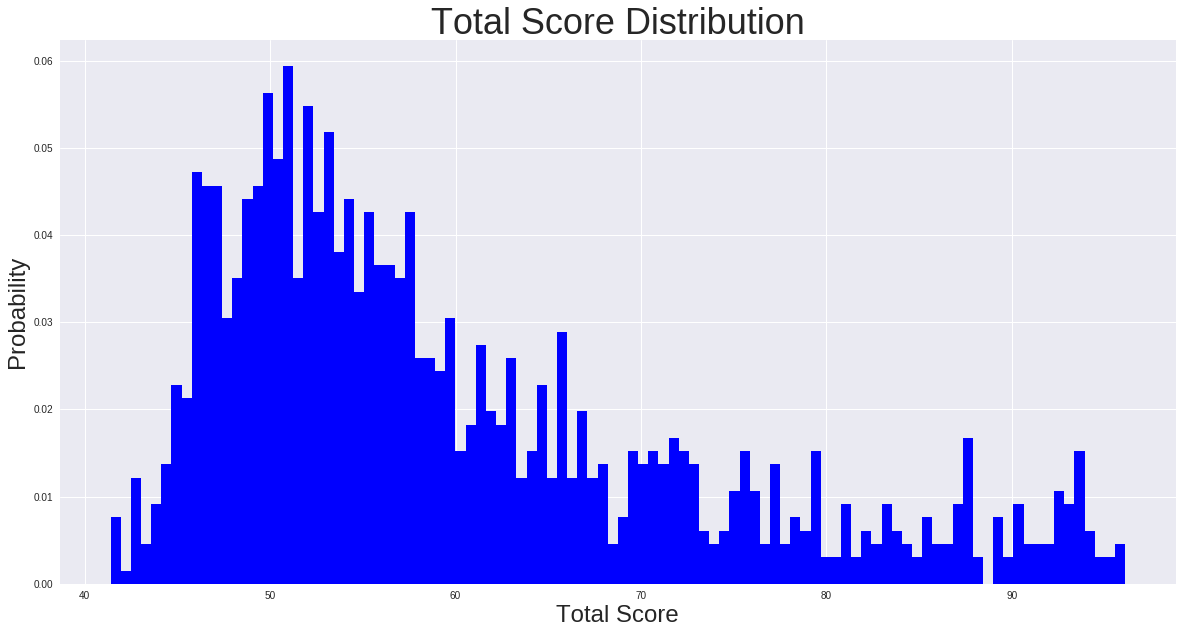

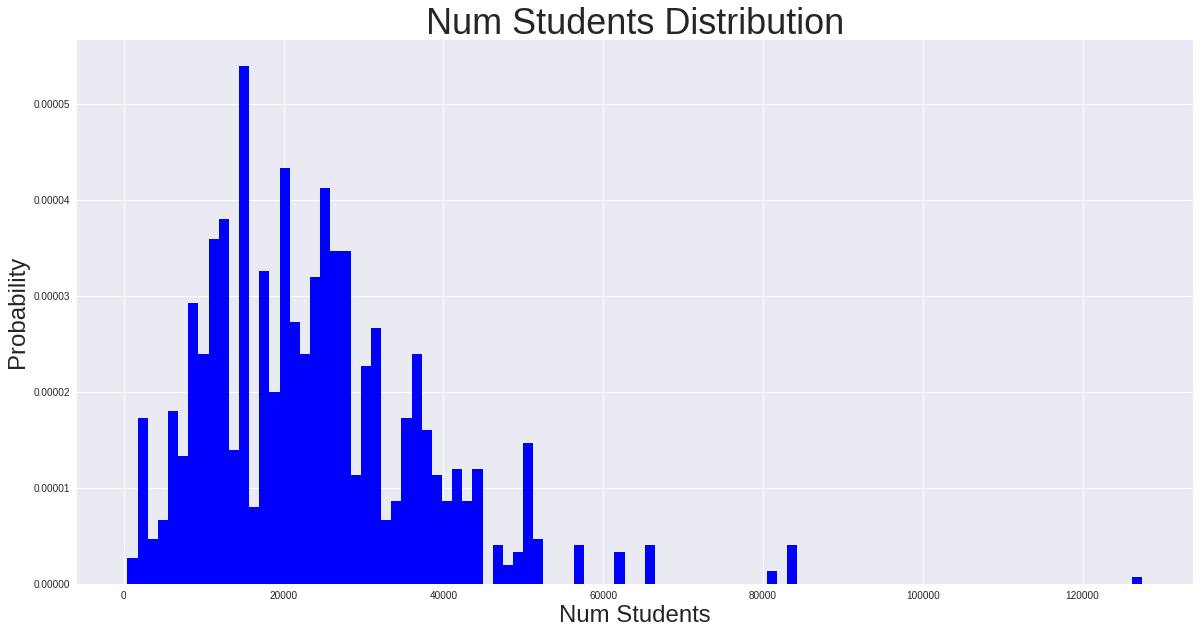

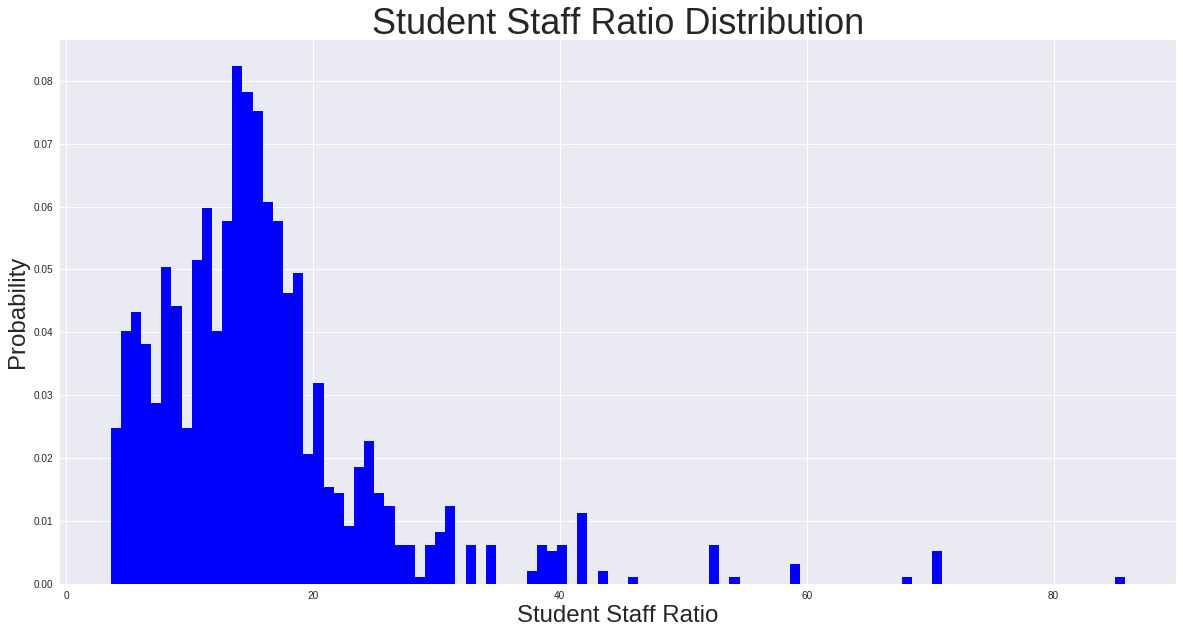

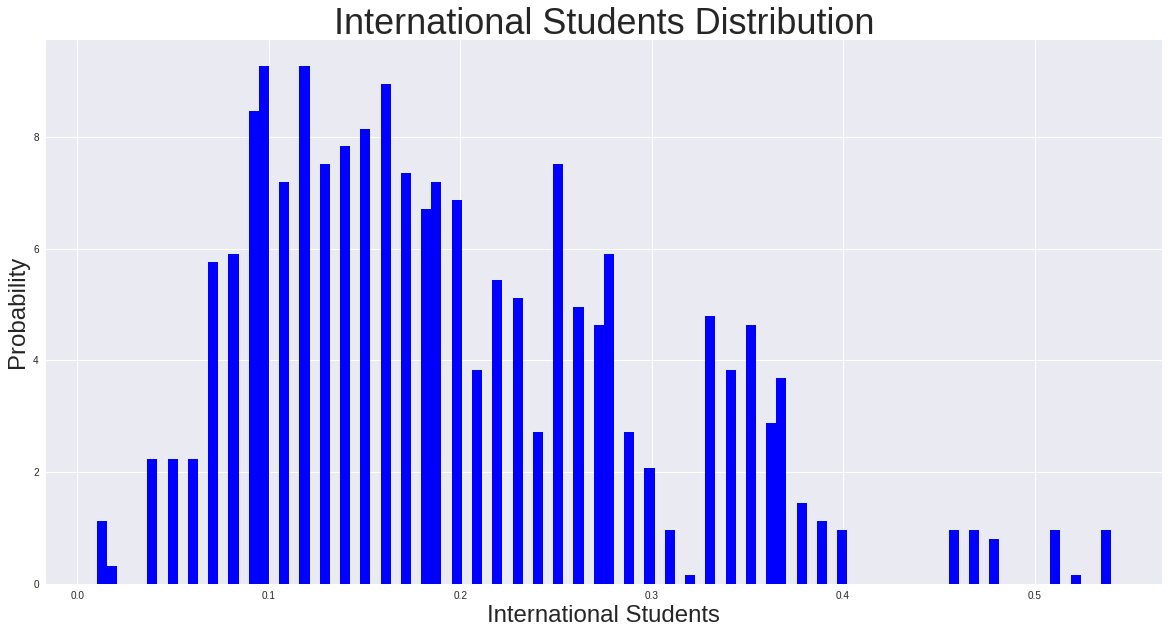

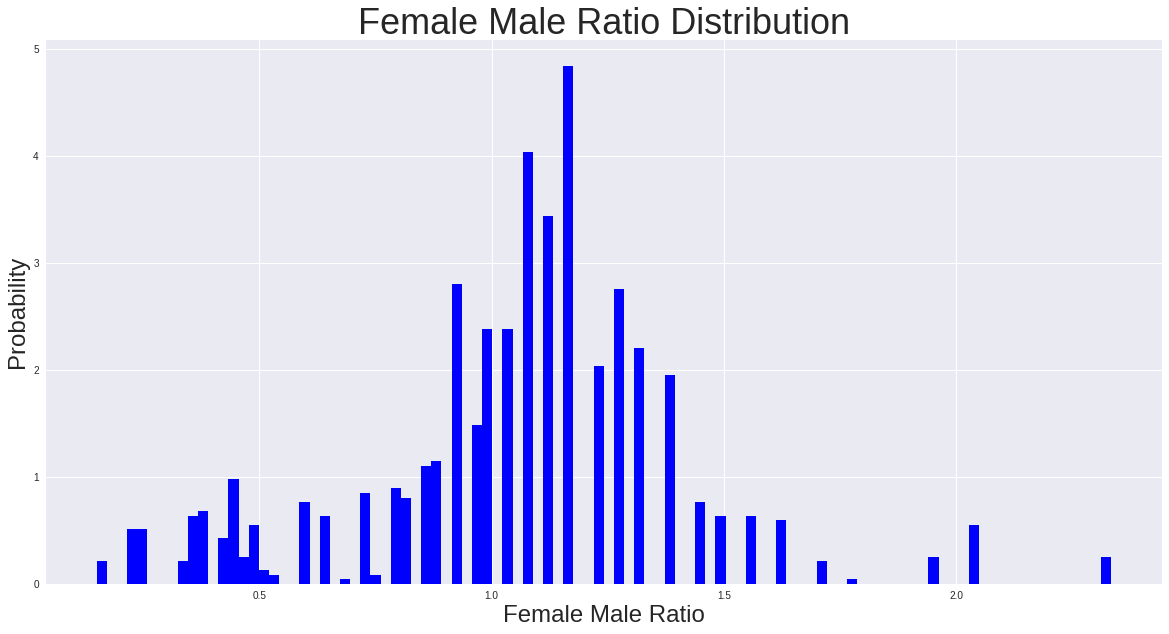

In [150]:
loop_plot(hist)

## Seaborn plot

A normed histogram like plt.hist();

A gaussian kernel density estimate; (like a fitting trend line)

A rugplot on the support axis (plot datapoints in an array as sticks on an axis).

In [151]:
def distplot(df, column):
    ax = sns.distplot(df[column].dropna(), rug=True, rug_kws={"color": "g"},
                      kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                      hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"})
    if '_' in column:
        column = column.replace('_', ' ')
    ax.set_xlabel(column.title(), fontsize = 24)
    ax.set_ylabel('Probability', fontsize = 24)
    ax.set_title('{} Distribution'.format(column).title(), fontsize = 36)
    sns.plt.show()

### KDE
In statistics, kernel density estimation is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

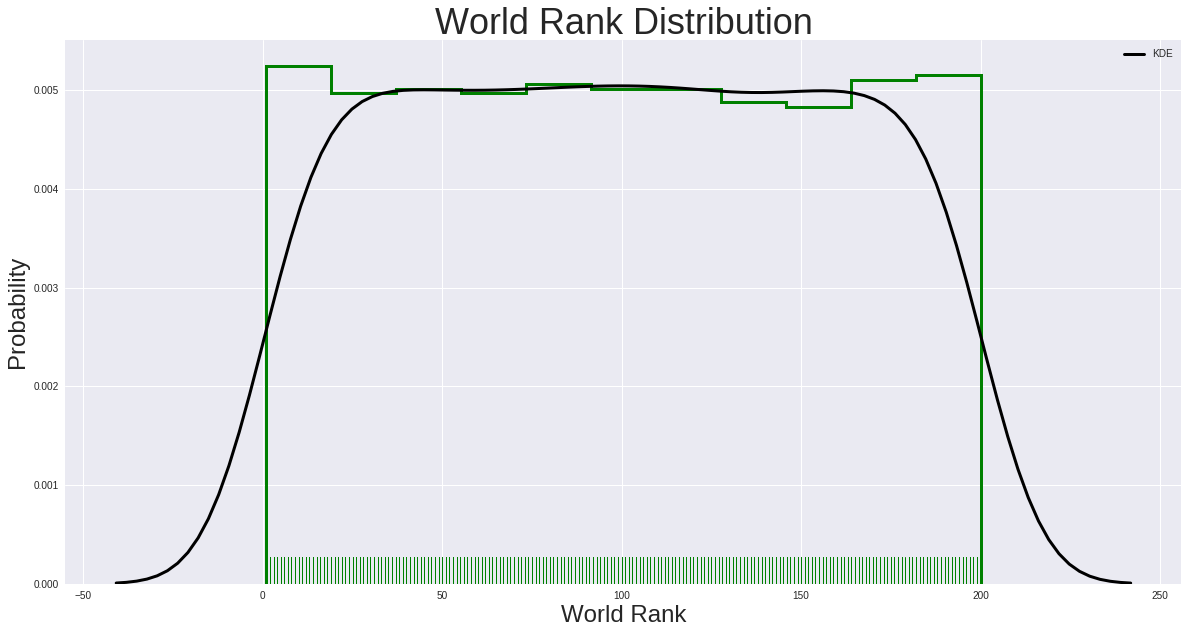

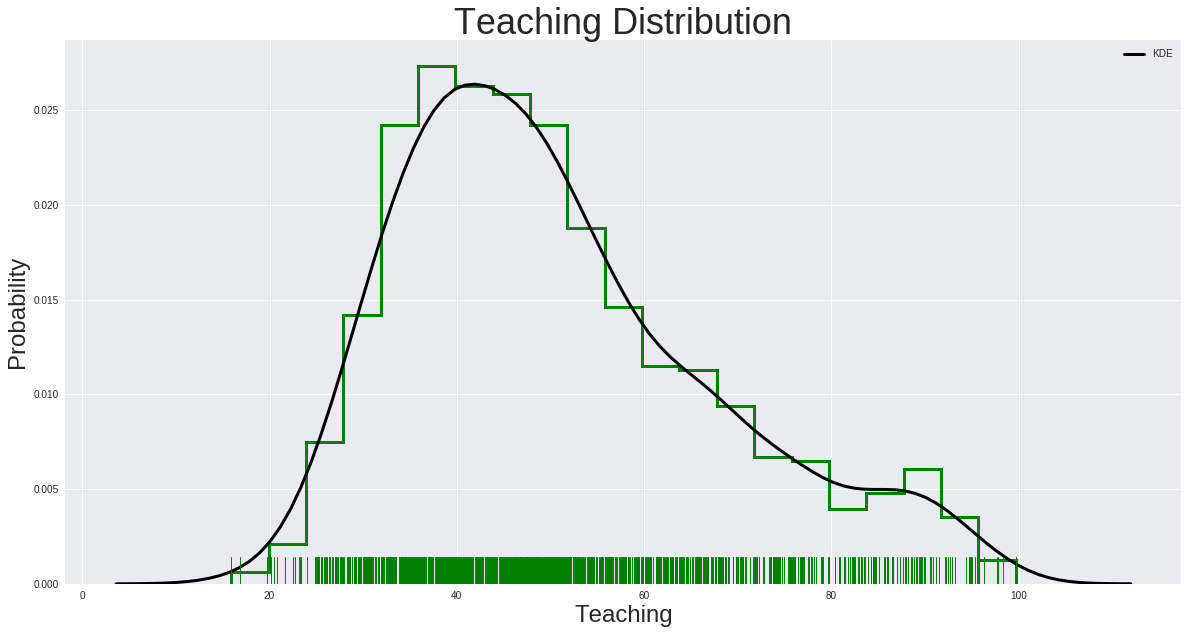

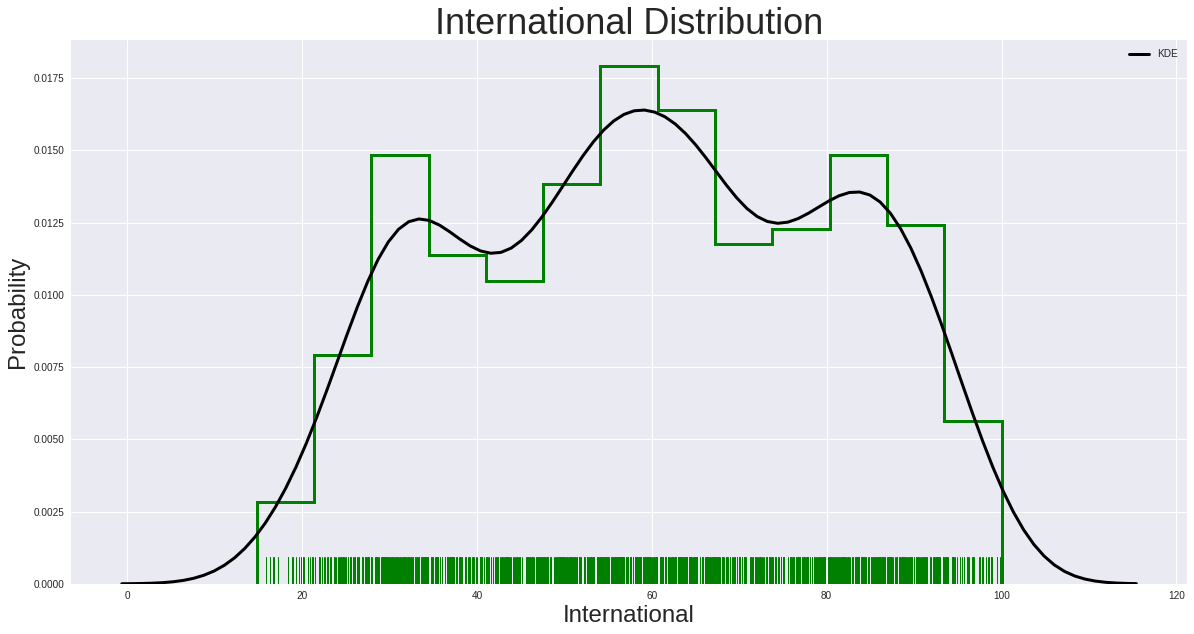

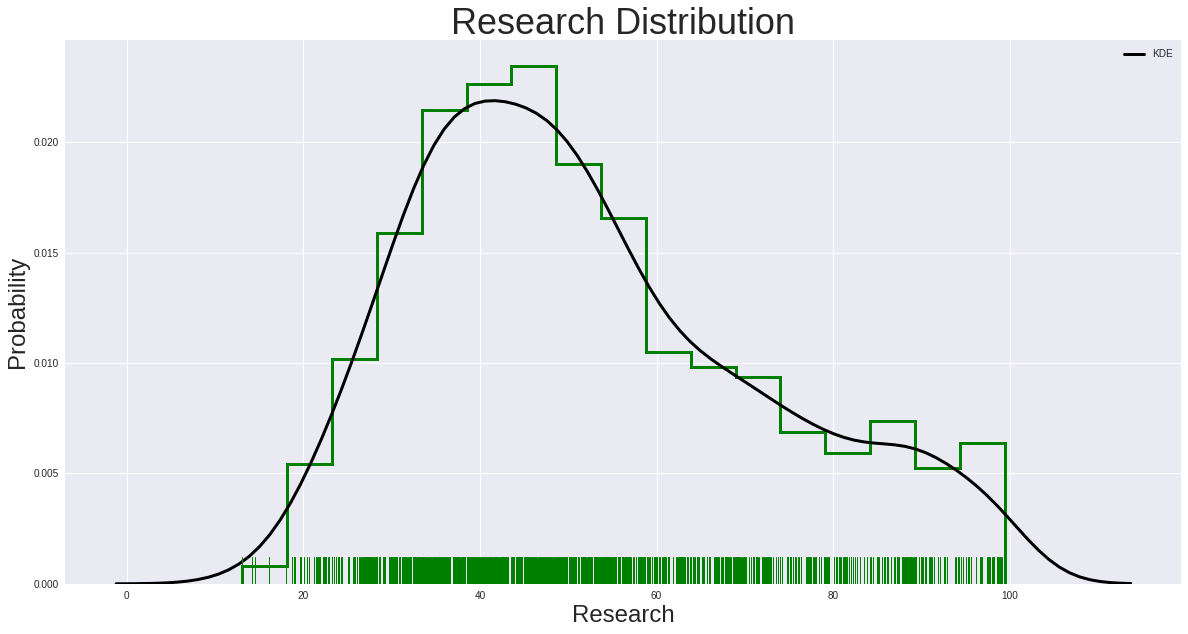

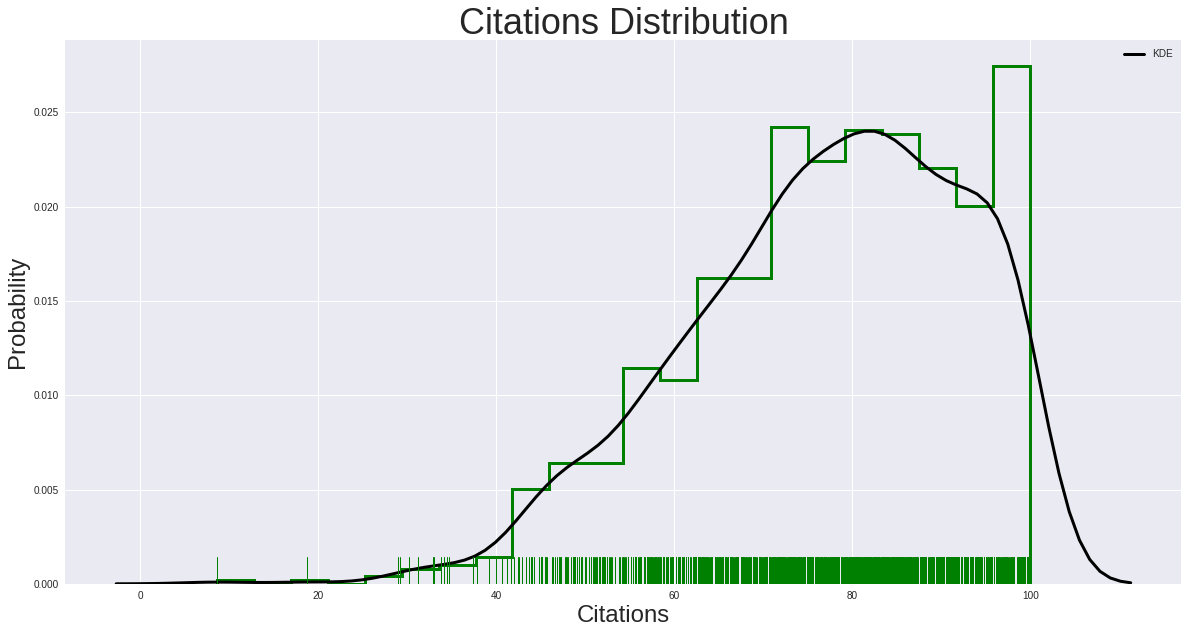

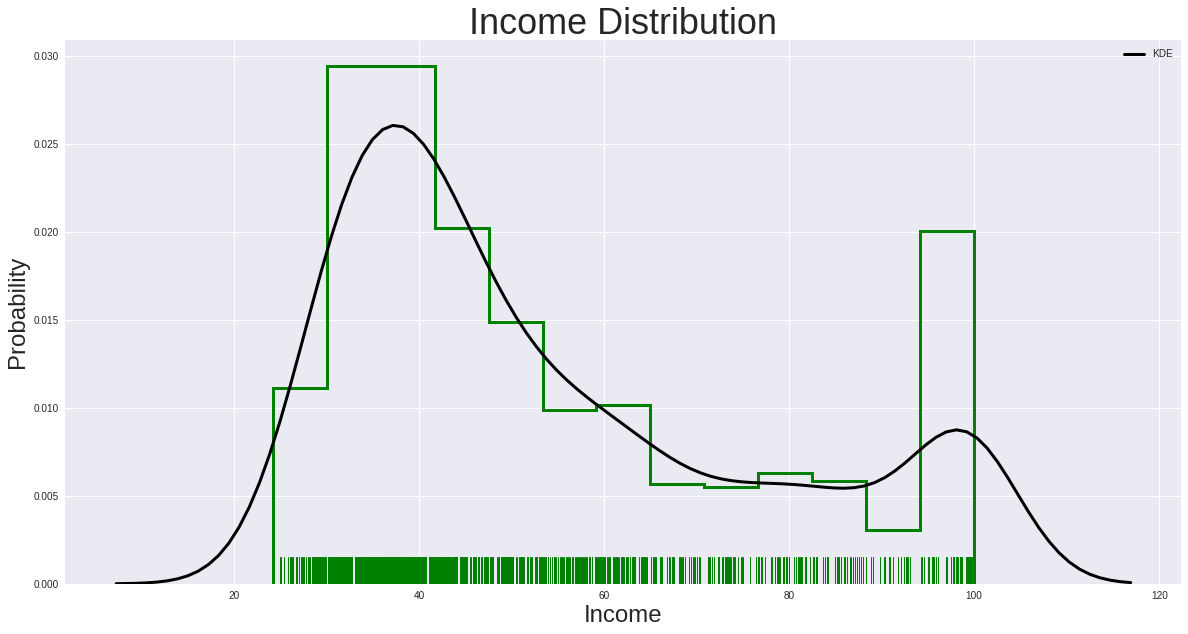

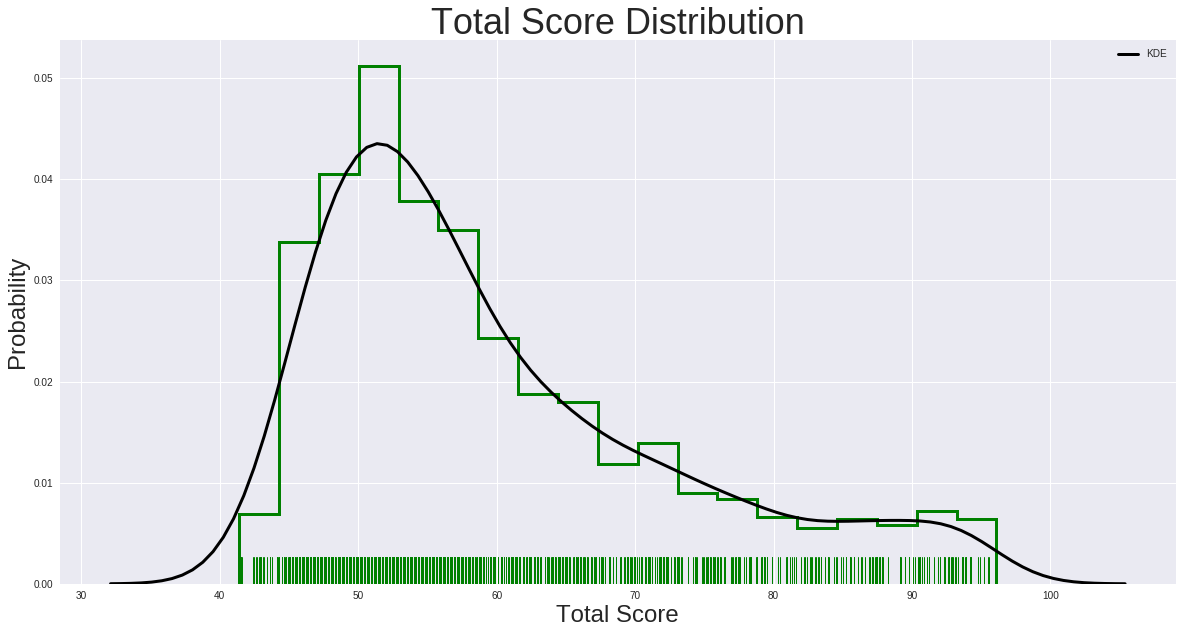

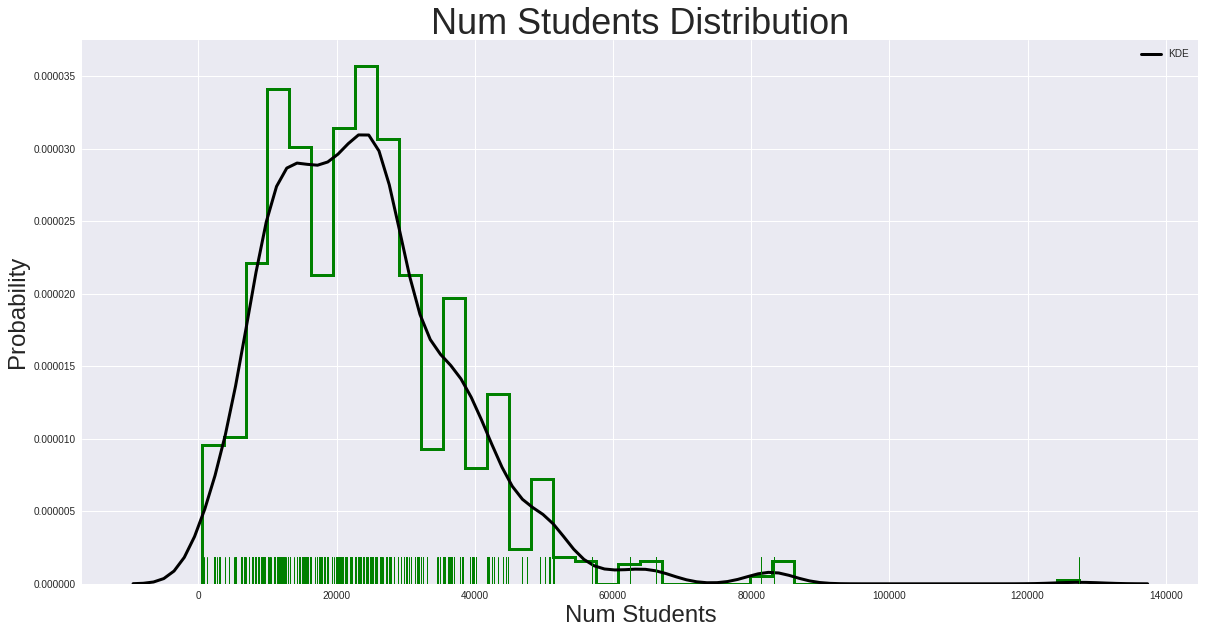

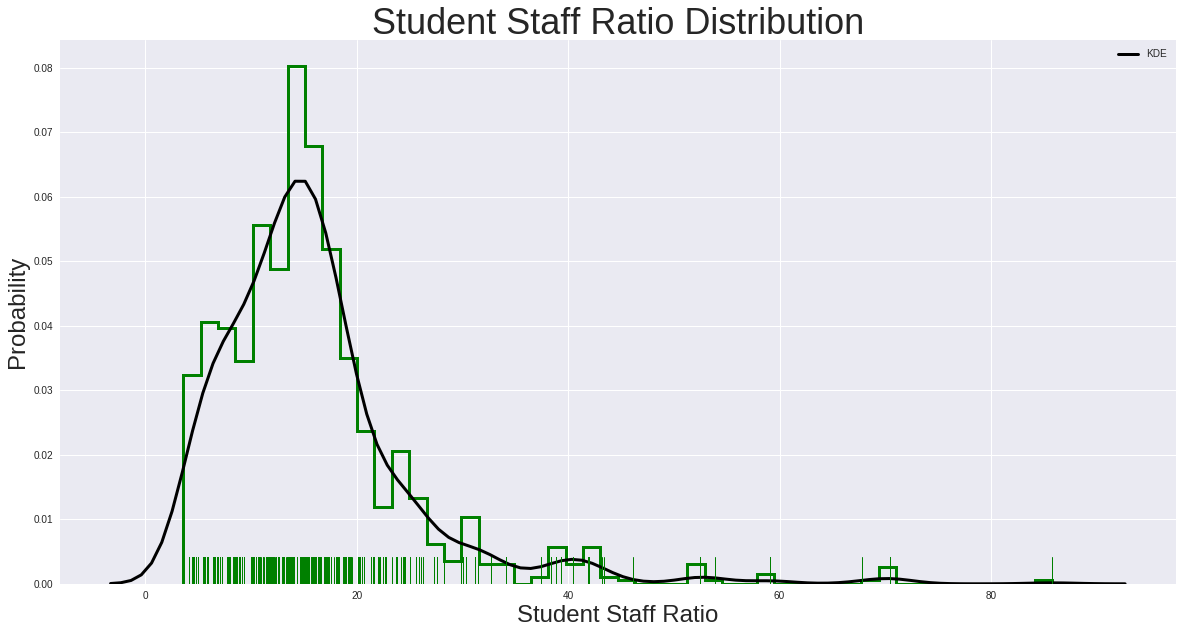

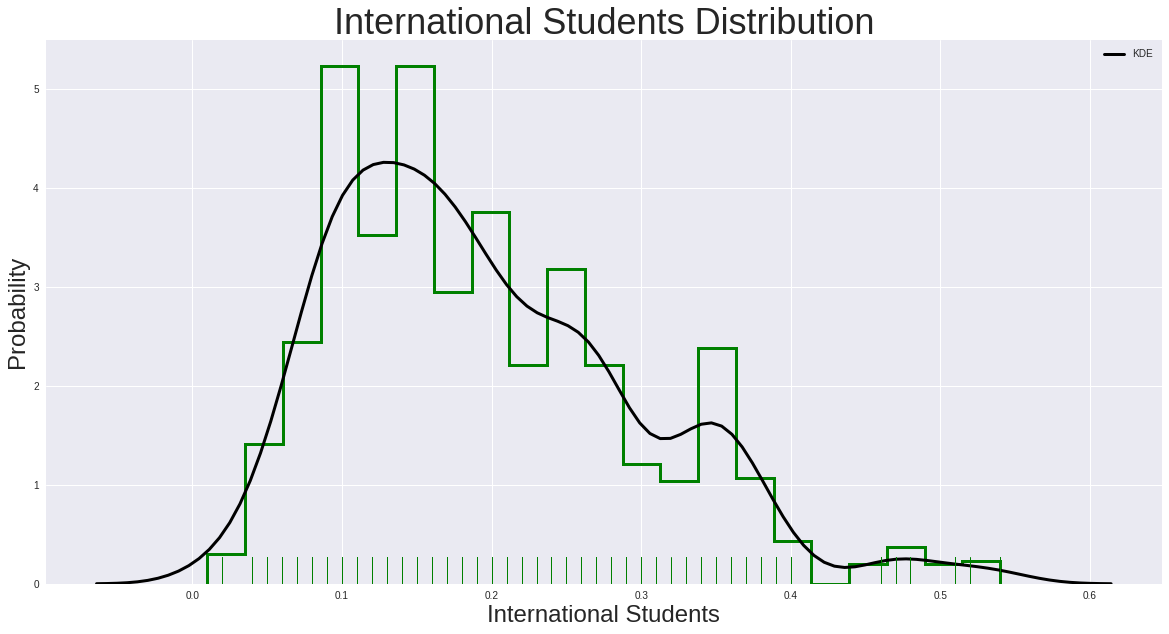

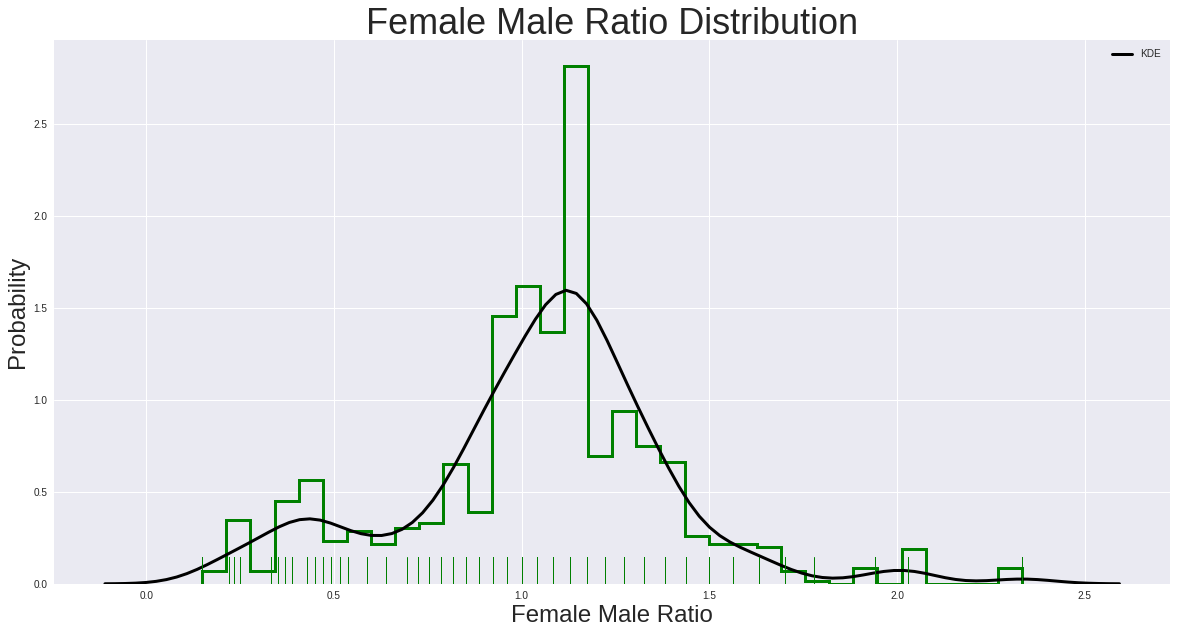

In [152]:
loop_plot(distplot)

Distplot from 2011 to 2016

In [153]:
def facegrid(df, column):
    g = sns.FacetGrid(df, col='year')
    g.map(sns.distplot, column)
    sns.plt.show()

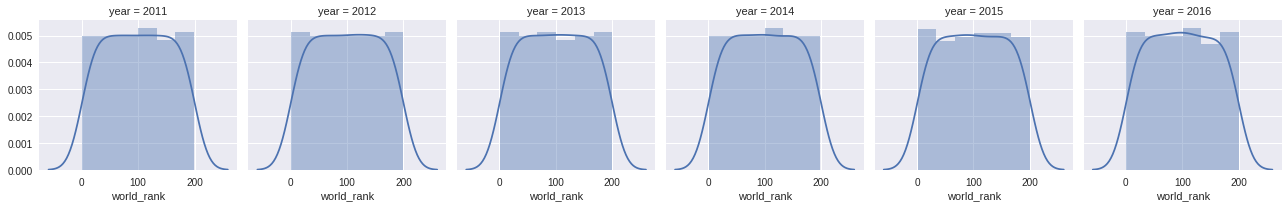

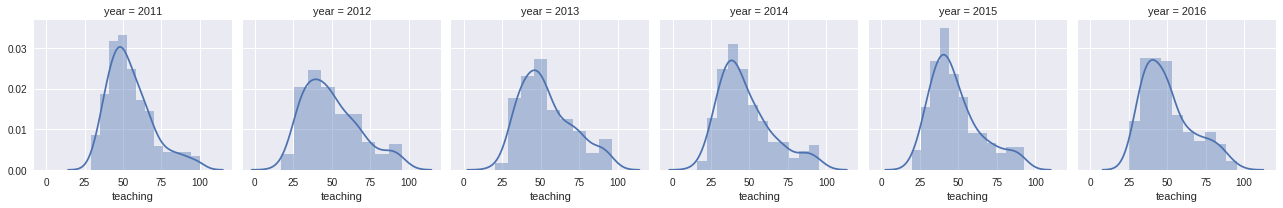

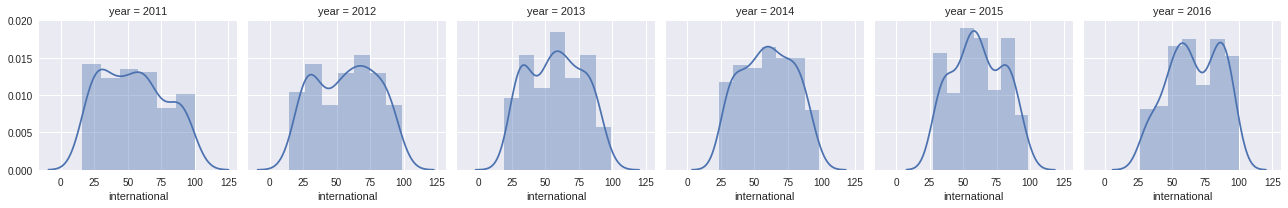

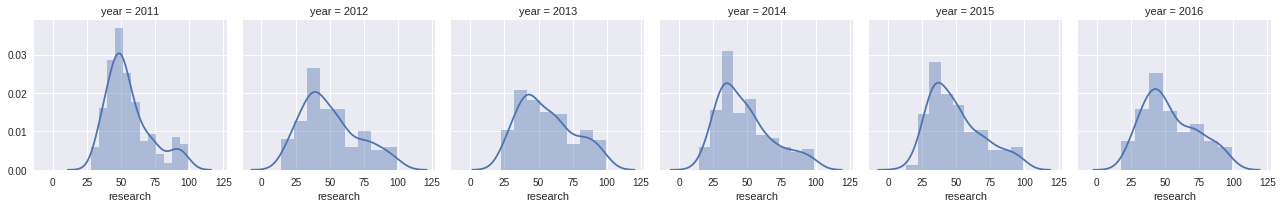

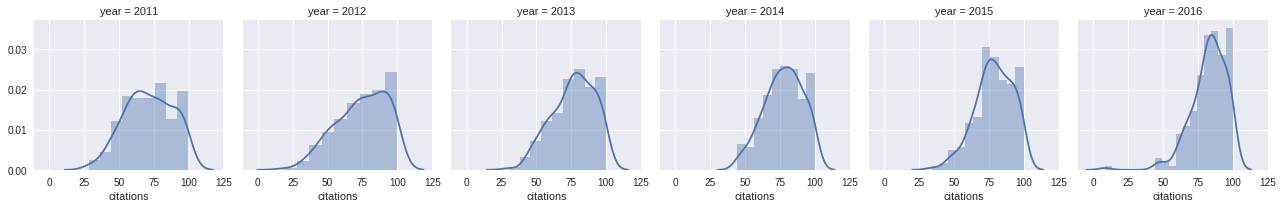

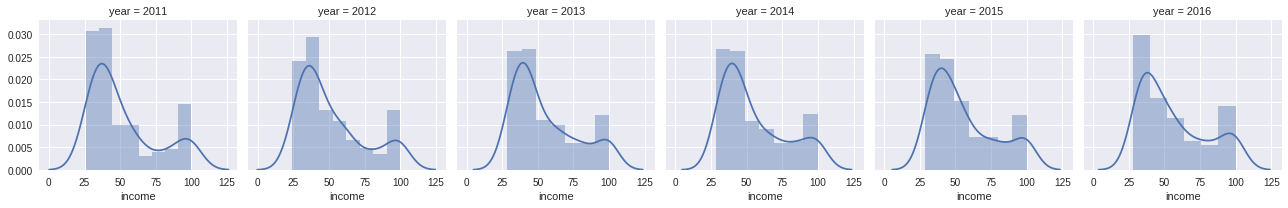

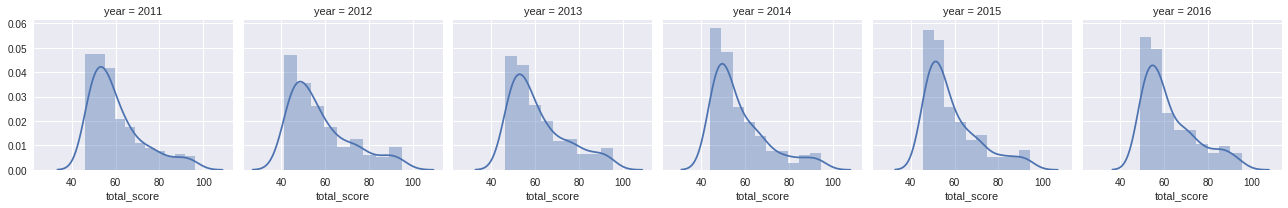

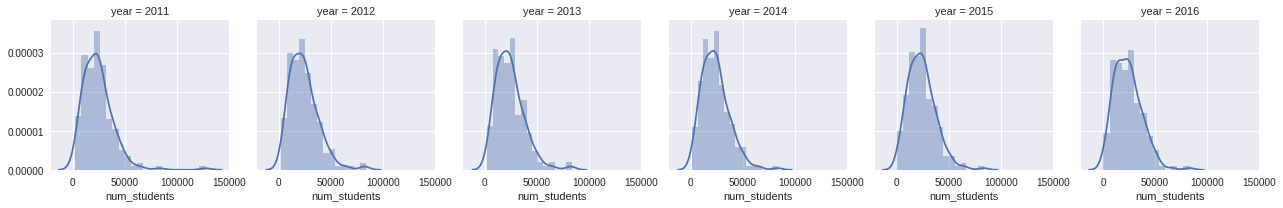

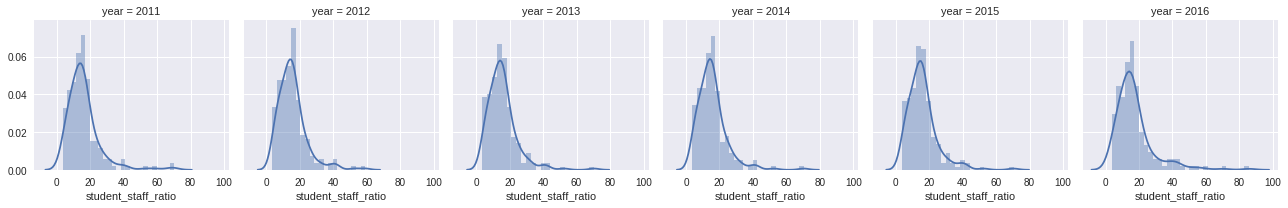

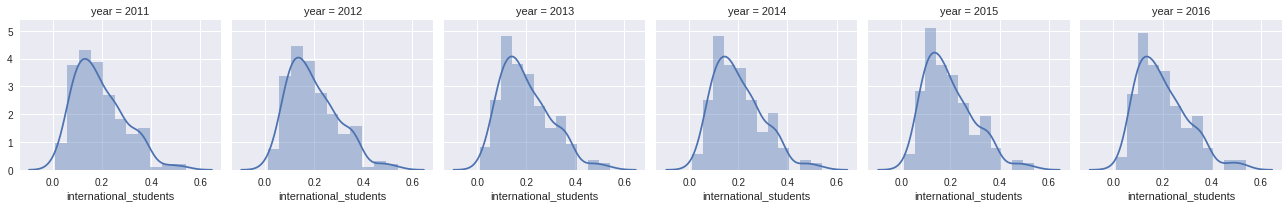

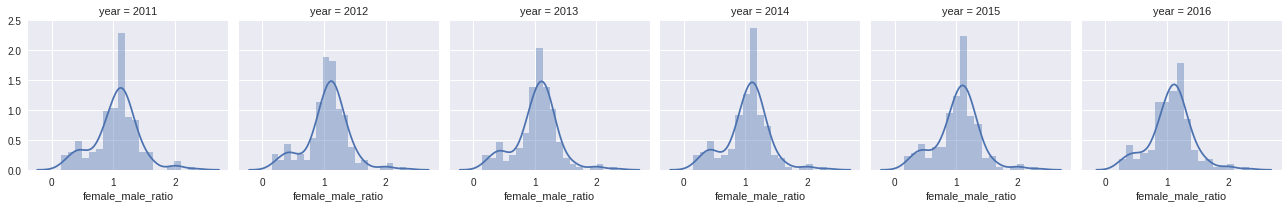

In [154]:
loop_plot(facegrid)

# Relationship

Pearson correlation coefficient is a measure of the linear correlation between two variables X and Y. 
It has a value between +1 and −1, where 
1 is total positive linear correlation, 0 is no linear correlation, and 
−1 is total negative linear correlation.

DataFrame.corr(method='pearson', min_periods=1)

In [155]:
data_corr = wur_data.corr()

The heatmap is a correlation matrix.

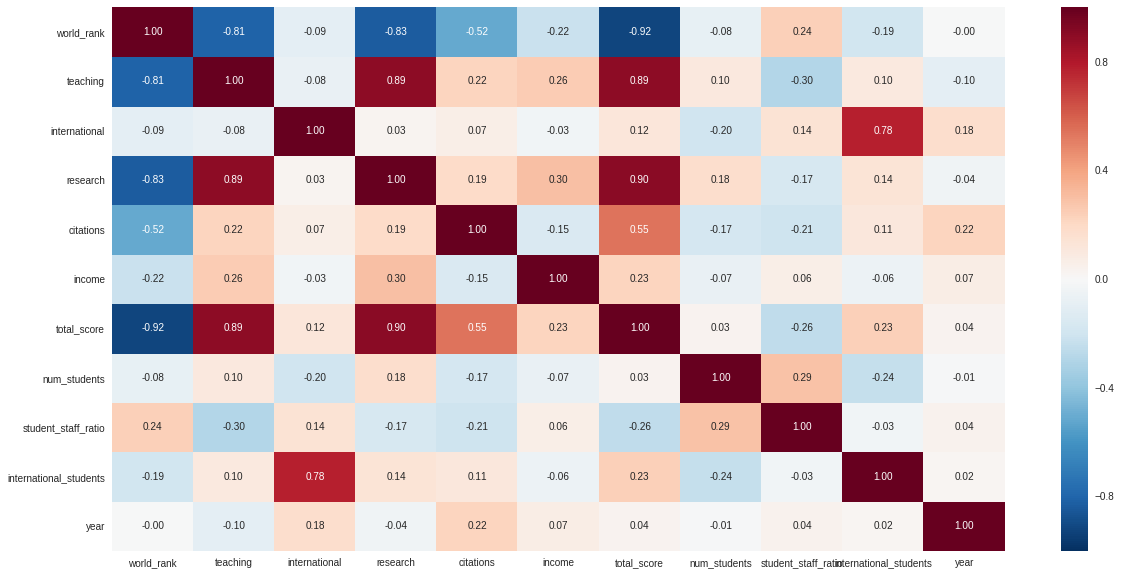

In [156]:
sns.heatmap(data_corr, annot=True, fmt=".2f")

Apart from parameters having PCC = 1 with themselves;

Some relationships with high Pearson correlation coefficient (more than 0.5):

research -- total_score; 0.90

teaching -- total_score; 0.89

research -- teaching; 0.89

international_students -- international; 0.78

citations -- total_score; 0.55

## Correlation between two parameters

Seaborn.jointplot():

Draw a plot of two variables with bivariate and univariate graphs;

Kind = 'reg'.

### Regression Analysis

In statistical modeling, regression analysis is a statistical process for estimating the relationships among variables. It includes many techniques for modeling and analyzing several variables, when the focus is on the relationship between a dependent variable and one or more independent variables (or 'predictors').

Pearson Correlation Coefficient (PCC);

P-value: the probabolity of an uncorrelated system producing datasets that have a Pearson correlation.

### research -- total_score    0.90

Apart from a single number PCC, jointplot visualises how two variables relate to each other.

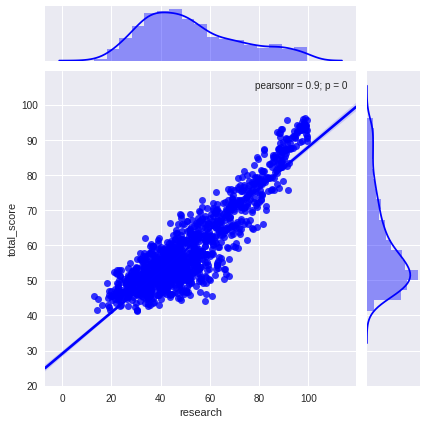

In [157]:
sns.jointplot(data=wur_data, x='research', y='total_score', kind='reg', color='b')
sns.plt.show()

### teaching -- total_score    0.89

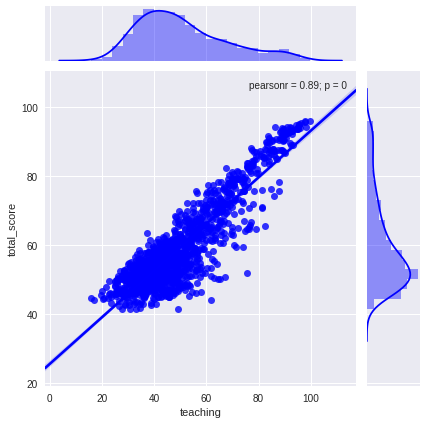

In [158]:
sns.jointplot(data=wur_data, x='teaching', y='total_score', kind='reg', color='b')
sns.plt.show()

### teaching -- research    0.89

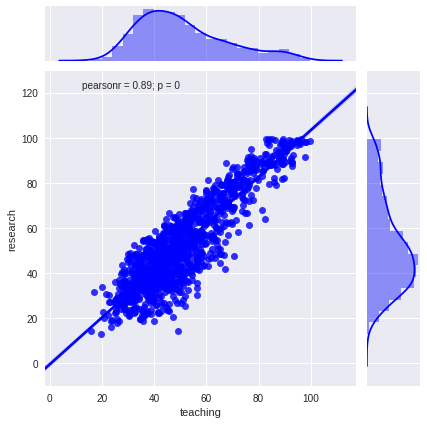

In [159]:
sns.jointplot(data=wur_data, x='teaching', y='research', kind='reg', color='b')
sns.plt.show()

Teaching, research, total_score have very close relationships with each other.

Both teaching and research account for 30% of the total_score.

Higher teaching score, higher research score; and vice versus.

High teaching and research scores, higher total_score.

### international_students -- international    0.78

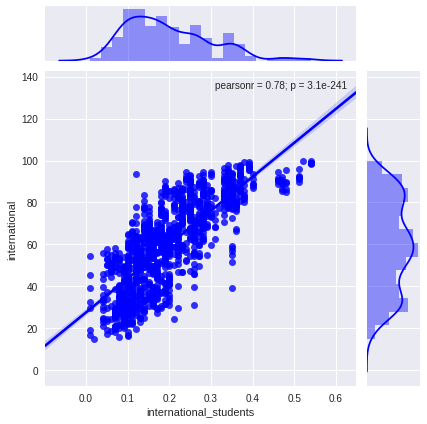

In [160]:
sns.jointplot(data=wur_data, x='international_students', y='international', kind='reg', color='b')
sns.plt.show()

Higher international_students ratio, higher international score.

### citations -- total_score 0.55

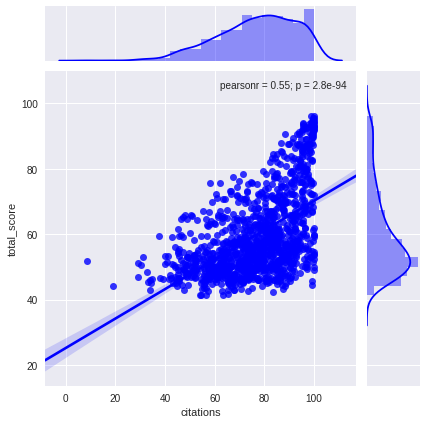

In [161]:
sns.jointplot(data=wur_data, x='citations', y='total_score', kind='reg', color='b')
sns.plt.show()

The relationship between citations and total_score is not that strong.

Even though citations also accounts for 30% of the total_score.

# Conclusion

The same trend in the last 6 years for five indicators: The average indicator scores of Asian countries (including China, Singapore, Japan and Sourth Korea) are increasing and exceeding some western countries.

This trend would continue in the future, hopefully and potentially.

Within 5 performance indicators:

Teaching and research have crucial correlation with both each other and the total_score, while the relationship between citations and total_score is not that strong.

Higher international_students ratio would much probably end up with higher international score.

# The End

# Thank You